# 데이터 파일
- 베스트셀러_최종버전3.csv
- 비베스트셀러_최종버전3.csv

In [11]:
import pandas as pd
df = pd.read_csv('베스트셀러_최종버전3.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TITLE           9804 non-null   object 
 1   AUTHOR          9804 non-null   object 
 2   PUBLER          9804 non-null   object 
 3   CLASS_NO        9804 non-null   object 
 4   PUBLER_YEAR     9804 non-null   int64  
 5   LANG            9804 non-null   object 
 6   PAGE            9804 non-null   float64
 7   ISBN            9804 non-null   int64  
 8   kyobo_best      9804 non-null   float64
 9   aladin_best     9804 non-null   float64
 10  yes24_best      9804 non-null   float64
 11  yp_best         9804 non-null   float64
 12  best_count      9804 non-null   float64
 13  LOAN_COUNT      9804 non-null   float64
 14  E_BOOK          9804 non-null   object 
 15  kyobo_po        9804 non-null   float64
 16  kyobo_ne        9804 non-null   float64
 17  kyobo_pnscore   9804 non-null   f

In [14]:
df.drop(['LANG', 'best_count'], axis=1, inplace=True)

In [15]:
# 변환할 열 목록
cols_to_convert = ['ISBN', 'PUBLER_YEAR']

# 각 열을 문자열(str)로 변환
for col in cols_to_convert:
    if col in df.columns:
        df[col] = df[col].astype(str)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TITLE           9804 non-null   object 
 1   AUTHOR          9804 non-null   object 
 2   PUBLER          9804 non-null   object 
 3   CLASS_NO        9804 non-null   object 
 4   PUBLER_YEAR     9804 non-null   object 
 5   PAGE            9804 non-null   float64
 6   ISBN            9804 non-null   object 
 7   kyobo_best      9804 non-null   float64
 8   aladin_best     9804 non-null   float64
 9   yes24_best      9804 non-null   float64
 10  yp_best         9804 non-null   float64
 11  LOAN_COUNT      9804 non-null   float64
 12  E_BOOK          9804 non-null   object 
 13  kyobo_po        9804 non-null   float64
 14  kyobo_ne        9804 non-null   float64
 15  kyobo_pnscore   9804 non-null   float64
 16  kyobo_review    9804 non-null   float64
 17  kyobo_rating    9804 non-null   f

In [ ]:
import pandas as pd
df = pd.read_csv('베스트셀러_최종버전3.csv')
df.drop(['LANG', 'best_count'], axis=1, inplace=True)
# 변환할 열 목록
cols_to_convert = ['ISBN', 'PUBLER_YEAR']

# 각 열을 문자열(str)로 변환
for col in cols_to_convert:
    if col in df.columns:
        df[col] = df[col].astype(str)

# 중분류별 감성점수

In [17]:
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. CLASS_NO별 평균 점수 계산
genre_score_by_platform = df.groupby('CLASS_NO')[platform_scores].mean().round(2)

# 3. 각 CLASS_NO별로 플랫폼 점수 정렬 및 순위 저장
ranked_results = []

for class_no, row in genre_score_by_platform.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results.append({
        'CLASS_NO': class_no,
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환 (전체 CLASS_NO 포함)
ranked_df = pd.DataFrame(ranked_results)

# 5. CLASS_NO 기준으로 정렬해서 보기 좋게 출력
ranked_df = ranked_df.sort_values('CLASS_NO')

# 6. 출력
ranked_df


,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,가정학 및 가정생활,yes24,17.78,kyobo,16.90,aladin,10.77,yp,0.17
1,"강연집, 수필집, 연설문집",yes24,28.92,kyobo,24.16,aladin,8.35,yp,0.90
2,"건축, 건축학",kyobo,25.40,yes24,15.05,aladin,8.81,yp,0.47
3,경제학,kyobo,36.20,yes24,23.53,aladin,12.15,yp,0.45
4,경학,kyobo,37.89,yes24,19.73,aladin,7.90,yp,0.22
...,...,...,...,...,...,...,...,...,...
80,행정학,kyobo,16.11,aladin,10.97,yes24,6.32,yp,0.22
81,형이상학,kyobo,13.14,aladin,5.96,yes24,3.50,yp,0.00
82,화학,yes24,13.08,kyobo,10.94,aladin,5.92,yp,0.00
83,화학공학,kyobo,10.86,yes24,8.99,aladin,7.90,yp,0.21


In [ ]:
import matplotlib.pyplot as plt

# 글씨 깨짐 방지 (한글 폰트 설정)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우일 경우
plt.rcParams['axes.unicode_minus'] = False

# plot: CLASS_NO별 플랫폼 점수 시각화
genre_score_by_platform.plot(kind='bar', figsize=(15, 6))

plt.title('CLASS_NO별 플랫폼 평균 점수 비교')
plt.ylabel('평균 점수')
plt.xlabel('CLASS_NO')
plt.xticks(rotation=45)
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import math

# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 등장 수 기준으로 CLASS_NO 정렬
# -> 원본 df에서 CLASS_NO별 등장 횟수 계산
class_counts = df['CLASS_NO'].value_counts()

# -> genre_score_by_platform 재정렬
genre_score_sorted = genre_score_by_platform.loc[class_counts.index.intersection(genre_score_by_platform.index)]
genre_score_sorted = genre_score_sorted.reindex(class_counts.index)

# ✅ 페이지 나누기 설정
n_pages = 3
total_rows = len(genre_score_sorted)
rows_per_page = math.ceil(total_rows / n_pages)

# ✅ 페이지별 시각화
for page in range(n_pages):
    start_idx = page * rows_per_page
    end_idx = min(start_idx + rows_per_page, total_rows)

    sliced = genre_score_sorted.iloc[start_idx:end_idx]

    # 그래프 그리기
    sliced.plot(kind='bar', figsize=(14, 6))
    plt.title(f'CLASS_NO별 플랫폼 평균 점수 비교 (Page {page+1}/{n_pages})')
    plt.ylabel('평균 점수')
    plt.xlabel('CLASS_NO (등장 수 기준 정렬)')
    plt.xticks(rotation=45)
    plt.legend(title='플랫폼')
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# ✅ 1. ranked_df에서 슬라이싱으로 CLASS_NO 추출
selected_class_nos = ranked_df.iloc[:10]['CLASS_NO'].tolist()  # 1번 ~ 9번 인덱스까지

# ✅ 2. 해당 CLASS_NO만 점수 필터링
selected_scores = genre_score_by_platform.loc[
    genre_score_by_platform.index.isin(selected_class_nos)
]

# ✅ 3. 시각화
selected_scores.plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.title('ranked_df[1:10] CLASS_NO별 플랫폼 점수 비교')
plt.ylabel('평균 점수')
plt.xlabel('CLASS_NO')
plt.xticks(rotation=0)
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()




In [ ]:
import seaborn as sns

plt.figure(figsize=(20, 16))
sns.heatmap(genre_score_by_platform, annot=True, cmap='YlGnBu', fmt='.2f')

plt.title('CLASS_NO별 플랫폼 점수 히트맵')
plt.ylabel('CLASS_NO')
plt.xlabel('플랫폼')
plt.tight_layout()
plt.show()


# 페이지별 스코어

In [67]:
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. PAGE별 평균 점수 계산
page_score_by_platform = df.groupby('PAGE')[platform_scores].mean().round(2)

# 3. 각 PAGE별로 플랫폼 점수 정렬 및 순위 저장
ranked_results_by_page = []

for page, row in page_score_by_platform.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results_by_page.append({
        'PAGE': page,
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환
ranked_by_page = pd.DataFrame(ranked_results_by_page)

# 5. PAGE 기준으로 정렬해서 출력
ranked_by_page = ranked_by_page.sort_values('PAGE')

# 6. 출력
ranked_by_page

,PAGE,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,1.0,yes24,28.62,aladin,25.48,kyobo,15.99,yp,0.12
1,14.0,yes24,35.88,kyobo,32.59,aladin,11.42,yp,0.00
2,22.0,aladin,78.05,yes24,48.98,kyobo,16.60,yp,1.75
3,24.0,aladin,17.47,yes24,8.35,kyobo,3.17,yp,0.00
4,25.0,kyobo,19.99,aladin,5.97,yes24,0.00,yp,0.00
...,...,...,...,...,...,...,...,...,...
784,1263.0,kyobo,10.87,aladin,5.92,yes24,0.00,yp,0.00
785,1292.0,aladin,5.86,kyobo,4.56,yes24,0.00,yp,0.00
786,1297.0,kyobo,33.23,aladin,25.28,yes24,16.90,yp,0.00
787,1339.0,aladin,8.07,kyobo,6.60,yes24,0.00,yp,0.00


In [ ]:
import matplotlib.pyplot as plt

# 1. PAGE별 평균 점수 데이터 (방법: 앞에서 만든 page_score_by_platform 사용)
# 이것은 df.groupby('PAGE')[platform_scores].mean().round(2) 로 생성된 것
page_score_by_platform.plot(kind='bar', figsize=(15, 6), colormap='Set2')

plt.title('PAGE별 플랫폼 평균 점수 비교')
plt.xlabel('페이지 수 (PAGE)')
plt.ylabel('평균 점수')
plt.xticks(rotation=0)
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import math

# ✅ 한글 폰트 설정 (글씨 깨짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기준
plt.rcParams['axes.unicode_minus'] = False

# ✅ 페이지 나누기 설정
n_pages = 20
total_rows = len(page_score_by_platform)
rows_per_page = math.ceil(total_rows / n_pages)  # 한 페이지에 들어갈 행 수

# ✅ 페이지별 시각화
for page in range(n_pages):
    start_idx = page * rows_per_page
    end_idx = min(start_idx + rows_per_page, total_rows)

    sliced = page_score_by_platform.iloc[start_idx:end_idx]

    # 그래프 그리기
    sliced.plot(kind='bar', figsize=(15, 6), colormap='Set2')
    plt.title(f'PAGE별 플랫폼 평균 점수 비교 (Page {page+1}/{n_pages})')
    plt.xlabel('페이지 수 (PAGE)')
    plt.ylabel('평균 점수')
    plt.xticks(rotation=0)
    plt.legend(title='플랫폼')
    plt.tight_layout()
    plt.show()


In [ ]:
import seaborn as sns

# 1. 1위 플랫폼만 추출
plt.figure(figsize=(14, 6))
sns.scatterplot(data=ranked_by_page, x='PAGE', y='1위점수', hue='1위', palette='tab10')

plt.title('페이지 수(PAGE)별 1위 플랫폼과 점수')
plt.xlabel('페이지 수')
plt.ylabel('1위 플랫폼 점수')
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(page_score_by_platform.T, annot=True, fmt='.2f', cmap='YlGnBu')

plt.title('페이지 수별 플랫폼 점수 히트맵')
plt.xlabel('페이지 수')
plt.ylabel('플랫폼')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# ✅ 1. 보고 싶은 ranked_by_page의 인덱스 범위 슬라이싱
selected_pages = ranked_by_page.iloc[:10]['PAGE'].tolist()

# ✅ 2. 해당 PAGE에 해당하는 점수만 필터링
selected_scores = page_score_by_platform.loc[
    page_score_by_platform.index.isin(selected_pages)
]

# ✅ 3. 막대그래프 시각화
selected_scores.plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.title(f'PAGE {selected_pages[0]} ~ {selected_pages[-1]} 범위의 플랫폼 점수')
plt.xlabel('PAGE')
plt.ylabel('평균 점수')
plt.xticks(rotation=0)
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()


# 출판시기별 성과점수

In [43]:
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. PUBLER_YEAR별 평균 점수 계산
pubyear_score_by_platform = df.groupby('PUBLER_YEAR')[platform_scores].mean().round(2)

# 3. 각 PUBLER_YEAR별로 플랫폼 점수 정렬 및 순위 저장
ranked_results_by_py = []

for pub_year, row in pubyear_score_by_platform.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results_by_py.append({
        'PUBLER_YEAR': pub_year,  # ✅ 여기를 수정
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환
ranked_by_py = pd.DataFrame(ranked_results_by_py)

# 5. 출판연도 기준 정렬
ranked_by_py = ranked_by_py.sort_values('PUBLER_YEAR')

# 6. 출력
ranked_by_py


,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,1981,yes24,52.65,aladin,45.11,kyobo,38.88,yp,0.00
1,1993,kyobo,22.05,yes24,21.08,aladin,0.90,yp,0.00
2,1994,aladin,101.13,kyobo,87.18,yp,8.08,yes24,0.00
3,1998,aladin,58.00,yes24,41.48,yp,0.90,kyobo,0.00
4,1999,aladin,80.28,yes24,62.05,yp,1.60,kyobo,0.00
5,2000,aladin,84.67,yes24,63.62,kyobo,38.64,yp,1.32
6,2001,aladin,120.28,kyobo,114.61,yes24,61.27,yp,1.92
7,2002,kyobo,71.82,aladin,70.84,yes24,55.88,yp,0.72
8,2003,aladin,117.84,yes24,58.31,kyobo,39.62,yp,1.00
9,2004,kyobo,106.47,aladin,63.68,yes24,51.77,yp,0.83


In [ ]:
import matplotlib.pyplot as plt

# 출판연도별 플랫폼 점수 시각화
pubyear_score_by_platform.plot(kind='bar', figsize=(14, 6), colormap='Set2')

plt.title('출판연도별 플랫폼 평균 점수 비교')
plt.xlabel('출판연도 (PUBLER_YEAR)')
plt.ylabel('평균 점수')
plt.xticks(rotation=45)
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.scatterplot(data=ranked_by_py, x='PUBLER_YEAR', y='1위점수', hue='1위', palette='tab10')

plt.title('출판연도별 1위 플랫폼과 점수')
plt.xlabel('출판연도 (PUBLER_YEAR)')
plt.ylabel('1위 플랫폼 점수')
plt.legend(title='플랫폼')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 저자별 성과점수

In [ ]:
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. 저자별 등장 횟수 계산
author_counts = df['AUTHOR'].value_counts()

# 3. 저자별 평균 점수 계산
author_score_by_platform = df.groupby('AUTHOR')[platform_scores].mean().round(2)

# 4. 등장횟수를 데이터프레임으로 변환하고 합치기
author_counts_df = author_counts.rename('등장횟수').to_frame()
author_summary = author_score_by_platform.join(author_counts_df)

# 5. 등장횟수 내림차순 정렬
author_summary_sorted = author_summary.sort_values(by='등장횟수', ascending=False)

# 6. 결과 출력
author_summary_sorted


,kyobo_score,aladin_score,yes24_score,yp_score,등장횟수
AUTHOR,,,,,
설민석,106.33,22.76,31.13,0.48,50
히로시마 레이코,60.90,8.63,34.19,0.17,48
히가시노 게이고,80.01,33.18,39.85,1.06,34
흔한남매,111.11,6.09,5.49,3.08,32
김미영,80.14,6.10,33.82,0.21,26
...,...,...,...,...,...
히조,18.53,1.80,0.00,0.00,1
히토 슈타이얼,5.27,2.90,0.00,0.00,1
힐러리 로댐 클린턴,7.39,10.08,47.92,0.00,1


<Figure size 1400x700 with 0 Axes>

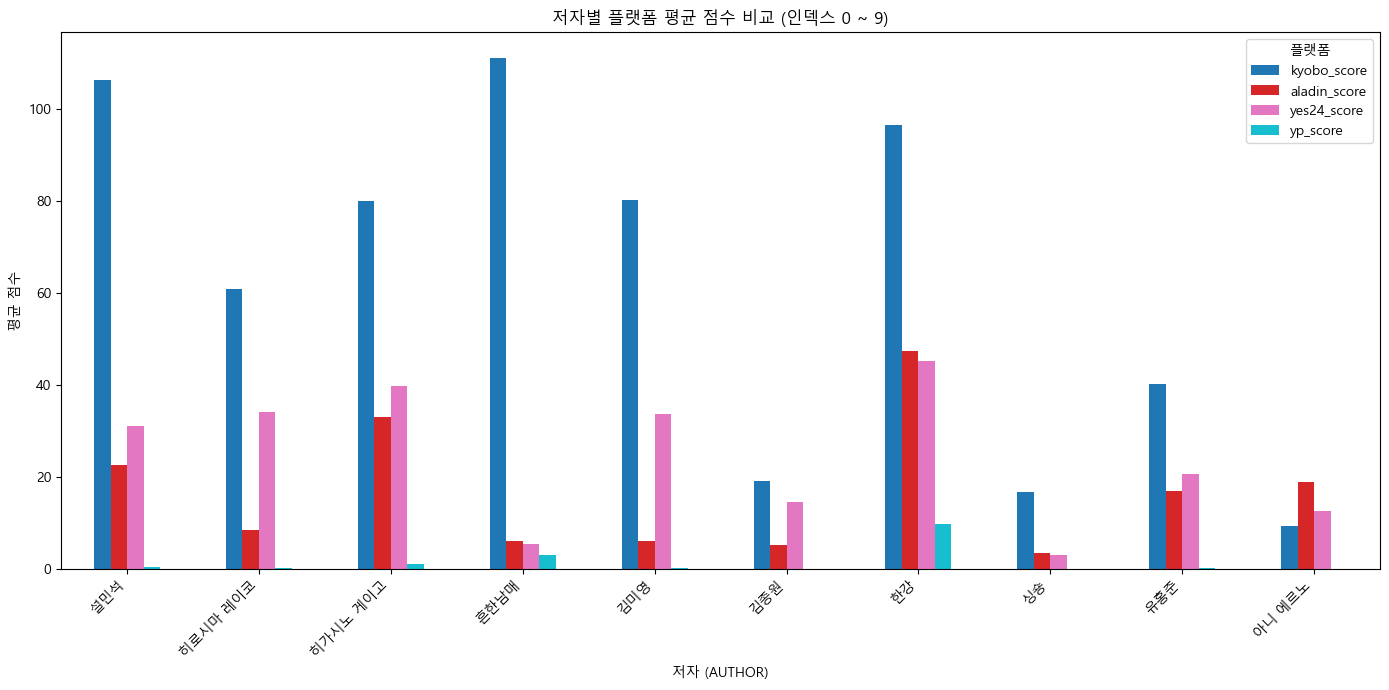

In [64]:
import matplotlib.pyplot as plt

# 슬라이싱 범위 설정 (예: 0 ~ 9번째 저자)
start_idx = 0
end_idx = 10

# 슬라이싱된 데이터
sliced_author_summary = author_summary_sorted.iloc[start_idx:end_idx]

# 플랫폼 점수 열들
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 그래프 크기 설정
plt.figure(figsize=(14, 7))

# 막대그래프 그리기
sliced_author_summary[platform_scores].plot(kind='bar', stacked=False, figsize=(14, 7), colormap='tab10')

plt.title(f'저자별 플랫폼 평균 점수 비교 (인덱스 {start_idx} ~ {end_idx - 1})')
plt.xlabel('저자 (AUTHOR)')
plt.ylabel('평균 점수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import math

# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기준
plt.rcParams['axes.unicode_minus'] = False

# ✅ 기본 설정
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']
n_pages = 20
total_rows = len(author_summary_sorted)
rows_per_page = math.ceil(total_rows / n_pages)  # 각 페이지에 들어갈 저자 수

# ✅ 페이지별 시각화 반복
for page in range(n_pages):
    start_idx = page * rows_per_page
    end_idx = min(start_idx + rows_per_page, total_rows)

    sliced_author_summary = author_summary_sorted.iloc[start_idx:end_idx]

    # 시각화
    sliced_author_summary[platform_scores].plot(
        kind='bar',
        stacked=False,
        figsize=(14, 7),
        colormap='tab10'
    )

    plt.title(f'저자별 플랫폼 평균 점수 비교 (Page {page+1}/{n_pages})')
    plt.xlabel('저자 (AUTHOR)')
    plt.ylabel('평균 점수')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='플랫폼')
    plt.tight_layout()
    plt.show()


# 출판사별 점수

In [ ]:
# 1. 출판사별 등장 횟수 계산
publisher_counts = df['PUBLER'].value_counts()

# 2. 출판사별 평균 점수 계산
publisher_score_by_platform = df.groupby('PUBLER')[platform_scores].mean().round(2)

# 3. 등장 횟수를 데이터프레임으로 변환 및 합치기
publisher_counts_df = publisher_counts.rename('등장횟수').to_frame()

# 4. 점수 데이터와 등장횟수 합치기
publisher_summary = publisher_score_by_platform.join(publisher_counts_df)

# 5. 등장횟수 내림차순으로 정렬
publisher_summary_sorted = publisher_summary.sort_values(by='등장횟수', ascending=False)

# 6. 출력
publisher_summary_sorted


,kyobo_score,aladin_score,yes24_score,yp_score,등장횟수
PUBLER,,,,,
문학동네,39.34,22.69,20.34,0.37,292
길벗,34.36,10.57,24.92,0.26,231
창비,37.45,24.68,26.28,0.96,213
위즈덤하우스,28.21,12.25,20.02,0.47,204
북이십일,37.57,8.51,19.47,0.24,198
...,...,...,...,...,...
호두,4.60,24.86,0.00,0.00,1
혜화동,7.37,4.38,9.09,0.00,1
BM 성안당,148.76,0.00,64.63,0.00,1


<Figure size 1600x800 with 0 Axes>

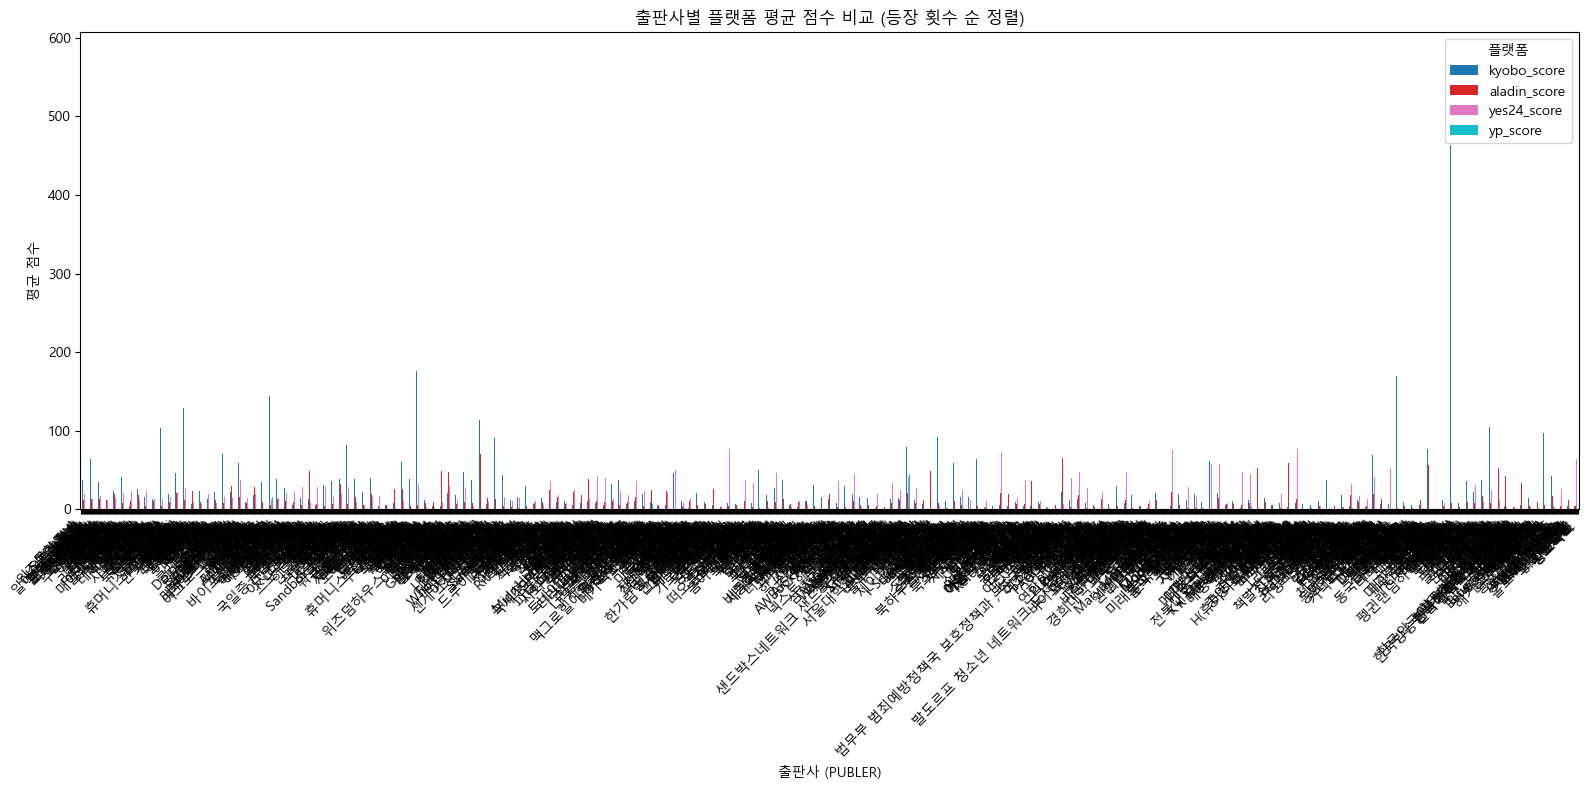

In [60]:
import matplotlib.pyplot as plt

# 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 출판사 이름 인덱스, 많이 등장한 순으로 정렬되어 있음
publisher_names = publisher_summary_sorted.index

# 시각화할 데이터 (점수만 추출)
scores_data = publisher_summary_sorted[platform_scores]

# 그래프 크기 설정
plt.figure(figsize=(16, 8))

# 막대그래프 그리기 (출판사별 각 플랫폼 점수)
scores_data.plot(kind='bar', stacked=False, figsize=(16, 8), colormap='tab10')

plt.title('출판사별 플랫폼 평균 점수 비교 (등장 횟수 순 정렬)')
plt.xlabel('출판사 (PUBLER)')
plt.ylabel('평균 점수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import math

# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기준
plt.rcParams['axes.unicode_minus'] = False

# ✅ 설정
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']
n_pages = 10
total_rows = len(publisher_summary_sorted)
rows_per_page = math.ceil(total_rows / n_pages)

# ✅ 페이지별 시각화
for page in range(n_pages):
    start_idx = page * rows_per_page
    end_idx = min(start_idx + rows_per_page, total_rows)

    sliced = publisher_summary_sorted.iloc[start_idx:end_idx]

    # 점수 데이터만 추출
    scores_data = sliced[platform_scores]

    # 시각화
    scores_data.plot(kind='bar', stacked=False, figsize=(16, 8), colormap='tab10')

    plt.title(f'출판사별 플랫폼 평균 점수 비교 (Page {page+1}/{n_pages})')
    plt.xlabel('출판사 (PUBLER)')
    plt.ylabel('평균 점수')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='플랫폼')
    plt.tight_layout()
    plt.show()


<Figure size 1400x700 with 0 Axes>

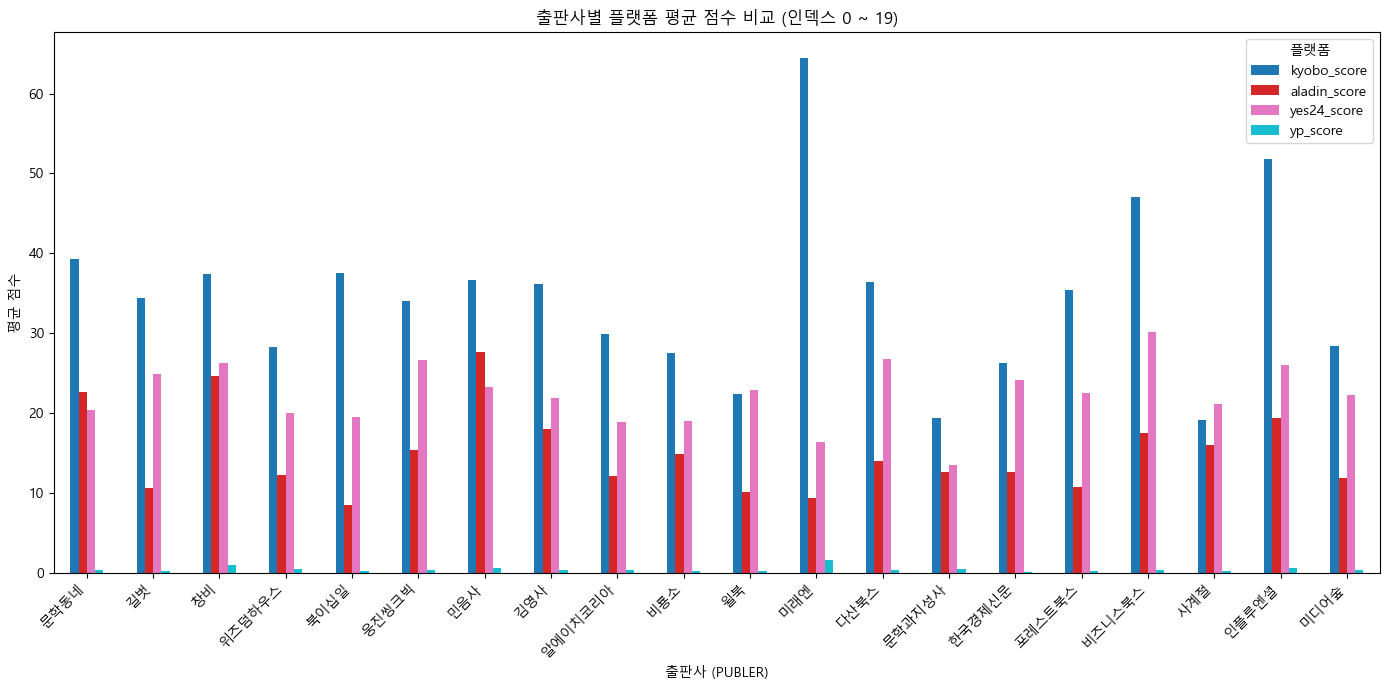

In [73]:
import matplotlib.pyplot as plt

# 슬라이싱 범위 지정 (예: 0~9번째 출판사만 보기)
start_idx = 0
end_idx = 20

# 슬라이싱된 데이터
sliced_publisher_summary = publisher_summary_sorted.iloc[start_idx:end_idx]

# 플랫폼 점수만 추출
scores_data = sliced_publisher_summary[platform_scores]

# 그래프 크기 설정
plt.figure(figsize=(14, 7))

# 막대그래프 그리기
scores_data.plot(kind='bar', stacked=False, figsize=(14, 7), colormap='tab10')

plt.title(f'출판사별 플랫폼 평균 점수 비교 (인덱스 {start_idx} ~ {end_idx-1})')
plt.xlabel('출판사 (PUBLER)')
plt.ylabel('평균 점수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()


# 쓸 수 있는 시각화 코드 모음

In [80]:
import pandas as pd
df1 = pd.read_csv('비베스트셀러_최종버전3.csv')
df1.drop(['LANG', 'best_count'], axis=1, inplace=True)
# 변환할 열 목록
cols_to_convert = ['ISBN', 'PUBLER_YEAR']

# 각 열을 문자열(str)로 변환
for col in cols_to_convert:
    if col in df1.columns:
        df1[col] = df1[col].astype(str)

In [1]:
import pandas as pd
df = pd.read_csv('베스트셀러_최종버전4.csv')
df1 = pd.read_csv('비베스트셀러_최종버전4.csv')

## 중분류별 점수

In [106]:
# 베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. CLASS_NO별 평균 점수 계산
genre_score_by_platform = df.groupby('CLASS_NO')[platform_scores].mean().round(2)

# 3. 각 CLASS_NO별로 플랫폼 점수 정렬 및 순위 저장
ranked_results = []

for class_no, row in genre_score_by_platform.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results.append({
        'CLASS_NO': class_no,
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환 (전체 CLASS_NO 포함)
ranked_df = pd.DataFrame(ranked_results)

# 5. CLASS_NO 기준으로 정렬해서 보기 좋게 출력
ranked_df = ranked_df.sort_values('CLASS_NO')

# 6. 출력
ranked_df

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,가정학 및 가정생활,yes24,17.78,kyobo,16.90,aladin,10.77,yp,0.17
1,"강연집, 수필집, 연설문집",yes24,28.92,kyobo,24.16,aladin,8.35,yp,0.90
2,"건축, 건축학",kyobo,25.40,yes24,15.05,aladin,8.81,yp,0.47
3,경제학,kyobo,36.20,yes24,23.53,aladin,12.15,yp,0.45
4,경학,kyobo,37.89,yes24,19.73,aladin,7.90,yp,0.22
...,...,...,...,...,...,...,...,...,...
80,행정학,kyobo,16.11,aladin,10.97,yes24,6.32,yp,0.22
81,형이상학,kyobo,13.14,aladin,5.96,yes24,3.50,yp,0.00
82,화학,yes24,13.08,kyobo,10.94,aladin,5.92,yp,0.00
83,화학공학,kyobo,10.86,yes24,8.99,aladin,7.90,yp,0.21


In [130]:
print(ranked_df['1위'].value_counts(), ranked_df['2위'].value_counts(), ranked_df['3위'].value_counts())

1위
kyobo     62
yes24     15
aladin     8
Name: count, dtype: int64 2위
yes24     47
aladin    23
kyobo     15
Name: count, dtype: int64 3위
aladin    54
yes24     23
kyobo      8
Name: count, dtype: int64


In [133]:
ranked_df.groupby('1위')['CLASS_NO'].sum()

1위
aladin    공연예술, 매체예술국방, 군사학도서학, 서지학사진예술식물학음악이슬람교(회교)일반 학...
kyobo     건축, 건축학경제학경학공예공학, 공업일반, 토목공학, 환경공학교육학기독교기술과학기타...
yes24     가정학 및 가정생활강연집, 수필집, 연설문집기계공학기타 제종교농업, 농학독일어문헌정...
Name: CLASS_NO, dtype: object

In [107]:
# 비베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. CLASS_NO별 평균 점수 계산
genre_score_by_platform1 = df1.groupby('CLASS_NO')[platform_scores].mean().round(2)

# 3. 각 CLASS_NO별로 플랫폼 점수 정렬 및 순위 저장
ranked_results = []

for class_no, row in genre_score_by_platform1.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results.append({
        'CLASS_NO': class_no,
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환 (전체 CLASS_NO 포함)
ranked_df1 = pd.DataFrame(ranked_results)

# 5. CLASS_NO 기준으로 정렬해서 보기 좋게 출력
ranked_df1 = ranked_df1.sort_values('CLASS_NO')

# 6. 출력
ranked_df1

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,가정학 및 가정생활,yes24,8.59,kyobo,3.78,aladin,2.75,yp,0.08
1,"강연집, 수필집, 연설문집",kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
2,"건축, 건축학",yes24,4.14,kyobo,2.10,aladin,1.25,yp,0.41
3,경제학,yes24,6.04,aladin,4.90,kyobo,2.99,yp,0.08
4,경학,kyobo,1.81,yes24,1.72,aladin,1.31,yp,0.27
...,...,...,...,...,...,...,...,...,...
80,행정학,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
81,형이상학,aladin,1.31,kyobo,1.09,yes24,0.00,yp,0.00
82,화학,kyobo,2.78,yes24,2.54,aladin,1.34,yp,0.00
83,화학공학,kyobo,2.51,yes24,1.97,aladin,1.01,yp,0.13


In [131]:
print(ranked_df1['1위'].value_counts(), ranked_df1['2위'].value_counts(), ranked_df1['3위'].value_counts())

1위
yes24     55
kyobo     24
aladin     6
Name: count, dtype: int64 2위
kyobo     36
aladin    33
yes24     16
Name: count, dtype: int64 3위
aladin    46
kyobo     25
yes24     14
Name: count, dtype: int64


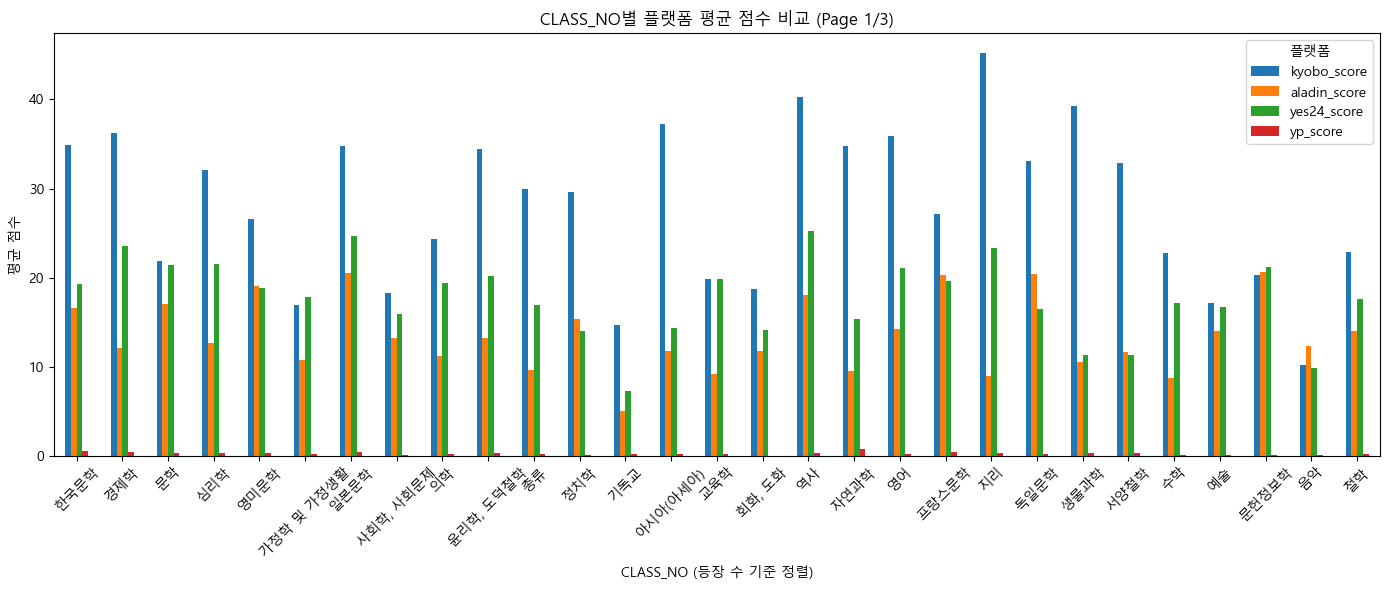

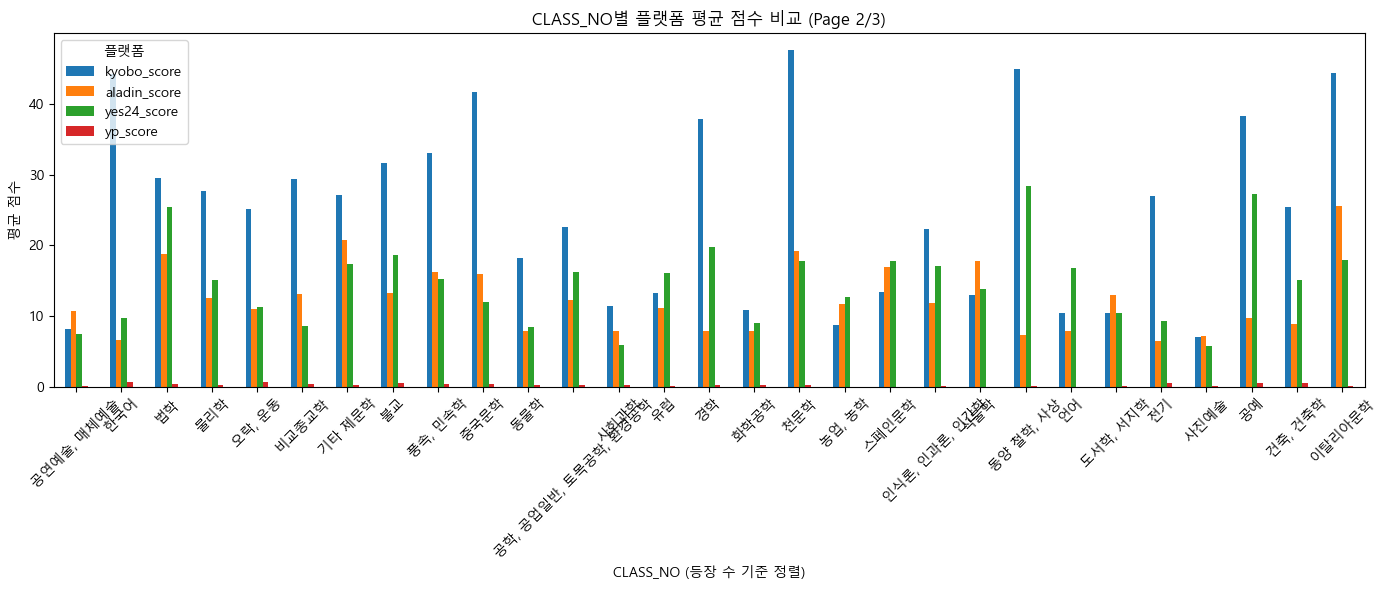

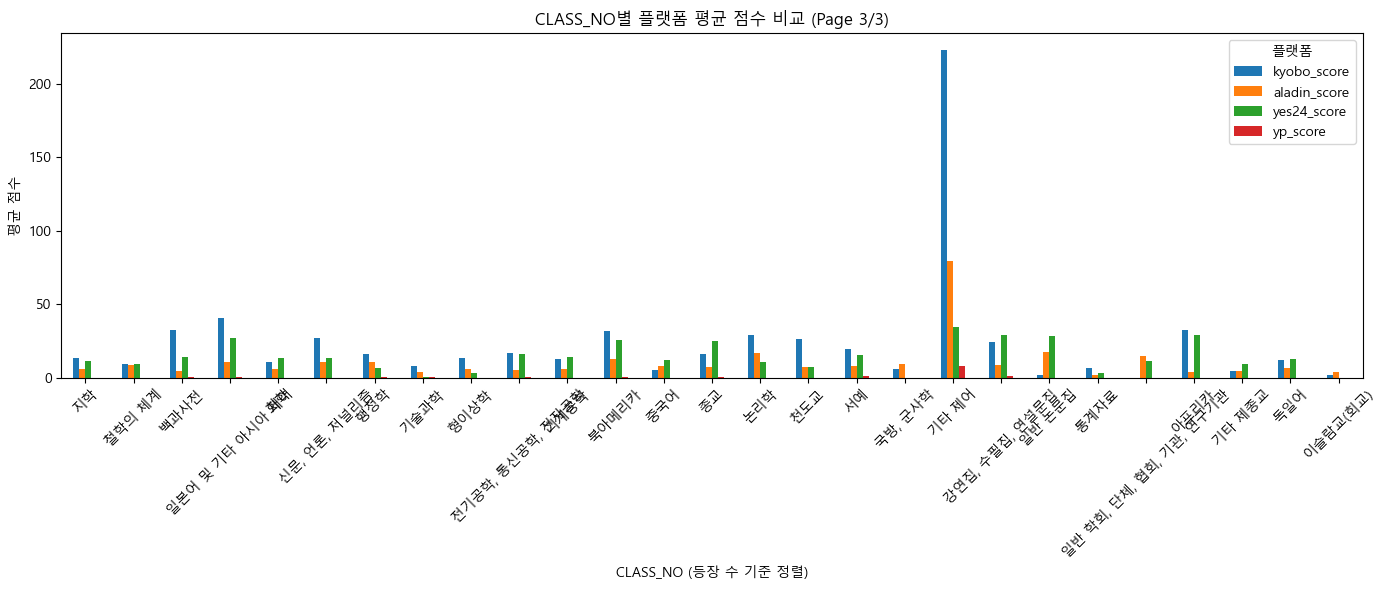

In [108]:
# 베스트
import matplotlib.pyplot as plt
import math

# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 등장 수 기준으로 CLASS_NO 정렬
# -> 원본 df에서 CLASS_NO별 등장 횟수 계산
class_counts = df['CLASS_NO'].value_counts()

# -> genre_score_by_platform 재정렬
genre_score_sorted = genre_score_by_platform.loc[class_counts.index.intersection(genre_score_by_platform.index)]
genre_score_sorted = genre_score_sorted.reindex(class_counts.index)

# ✅ 페이지 나누기 설정
n_pages = 3
total_rows = len(genre_score_sorted)
rows_per_page = math.ceil(total_rows / n_pages)

# ✅ 페이지별 시각화
for page in range(n_pages):
    start_idx = page * rows_per_page
    end_idx = min(start_idx + rows_per_page, total_rows)

    sliced = genre_score_sorted.iloc[start_idx:end_idx]

    # 그래프 그리기
    sliced.plot(kind='bar', figsize=(14, 6))
    plt.title(f'CLASS_NO별 플랫폼 평균 점수 비교 (Page {page+1}/{n_pages})')
    plt.ylabel('평균 점수')
    plt.xlabel('CLASS_NO (등장 수 기준 정렬)')
    plt.xticks(rotation=45)
    plt.legend(title='플랫폼')
    plt.tight_layout()
    plt.show()

- 베스트
대부분의 장르에서 교보문고가 우세한 모습
가정학, 강연집, 기계공학, 기타 제종교, 농업, 독일어, 문헌정보학, 스페인 문학, 언어, 유럽, 일반 논문집, 종교, 중국어, 철학의 체계, 화학 분야는 yes24가 우세함
이 중 강연집, 기타 제종교, 언어, 일반 논문집, 종교, 중국어 의 경우 yes24가 많이 우세함(2위랑 감성점수 4점 이상 차이)
공연예술, 국방, 도서학, 사진예술, 식물학, 음악, 이슬람굑, 일반학회 장르는 aladin이 우세
이 중 국방, 식물학, 일반 학회의 경우 aladin이 많이 우세(2위랑 감성점수 3.5점 이상 차이)

-> 사람들이 많이 찾는 도서의 경우 대부분 교보문고에서 베스트셀러가 많이 나옴(이 도서들의 경우 점수 차가 4점 이상차이, 몇십점씩 차이나는 도서 장르도 존재함)
-> 반면 상대적으로 덜 찾는 장르의 도서는 yes24, aladin에서도 베스트셀러가 나오며 점수 또한 좋음
-> 베스트셀러가 목적인 도서의 경우 교보문고의 우선투자는 필수이고 다른 플랫폼도 투자할 필요성 높음, 하지만 플랫폼별 베스트셀러 데이터를 조금 더 살펴봐야 할 필요성

In [136]:
ranked_df[ranked_df['1위'] == 'yes24']

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,가정학 및 가정생활,yes24,17.78,kyobo,16.90,aladin,10.77,yp,0.17
1,"강연집, 수필집, 연설문집",yes24,28.92,kyobo,24.16,aladin,8.35,yp,0.90
10,기계공학,yes24,14.36,kyobo,12.74,aladin,6.03,yp,0.00
15,기타 제종교,yes24,9.19,kyobo,4.58,aladin,4.42,yp,0.00
17,"농업, 농학",yes24,12.65,aladin,11.73,kyobo,8.74,yp,0.00
20,독일어,yes24,12.91,kyobo,12.24,aladin,6.62,yp,0.00
24,문헌정보학,yes24,21.24,aladin,20.63,kyobo,20.35,yp,0.08
38,스페인문학,yes24,17.75,aladin,16.92,kyobo,13.41,yp,0.00
44,언어,yes24,16.79,kyobo,10.39,aladin,7.93,yp,0.00
50,유럽,yes24,16.06,kyobo,13.19,aladin,11.09,yp,0.05


In [137]:
ranked_df[ranked_df['1위'] == 'aladin']

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
5,"공연예술, 매체예술",aladin,10.74,kyobo,8.10,yes24,7.42,yp,0.08
9,"국방, 군사학",aladin,9.48,kyobo,5.99,yes24,0.00,yp,0.00
18,"도서학, 서지학",aladin,12.98,yes24,10.47,kyobo,10.46,yp,0.10
31,사진예술,aladin,7.11,kyobo,6.99,yes24,5.71,yp,0.14
39,식물학,aladin,17.79,yes24,13.75,kyobo,12.96,yp,0.00
52,음악,aladin,12.30,kyobo,10.17,yes24,9.81,yp,0.08
54,이슬람교(회교),aladin,3.75,kyobo,1.80,yes24,0.00,yp,0.00
58,"일반 학회, 단체, 협회, 기관, 연구기관",aladin,15.00,yes24,11.51,kyobo,0.00,yp,0.00


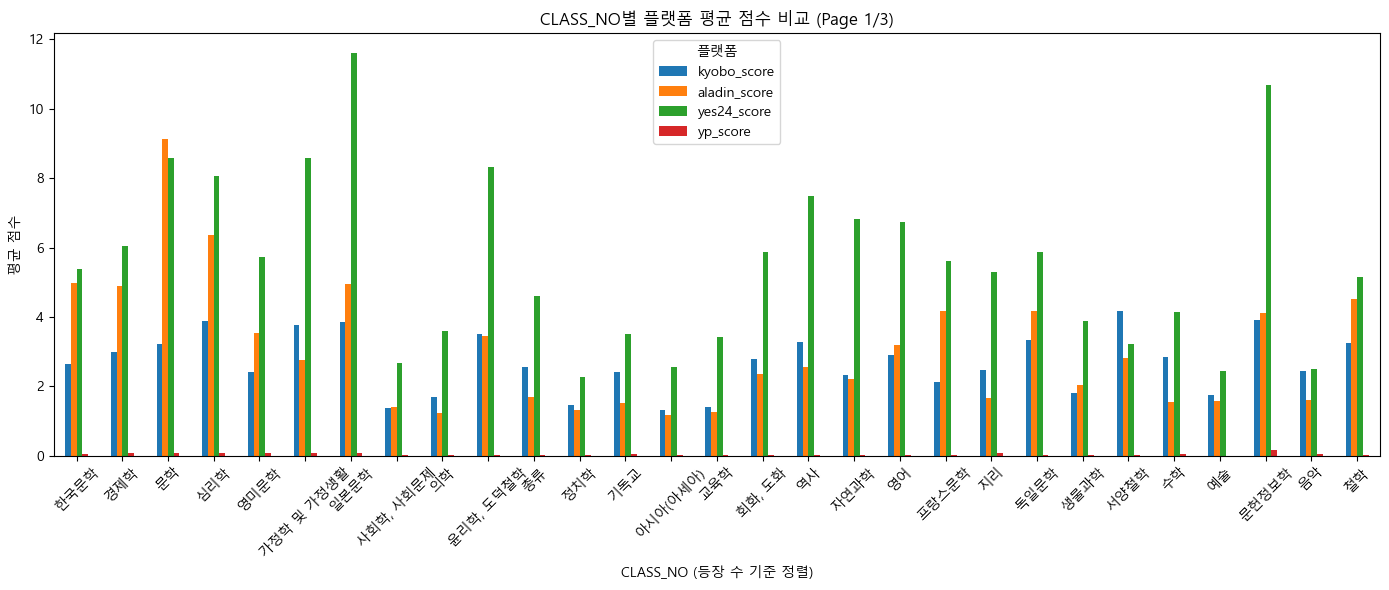

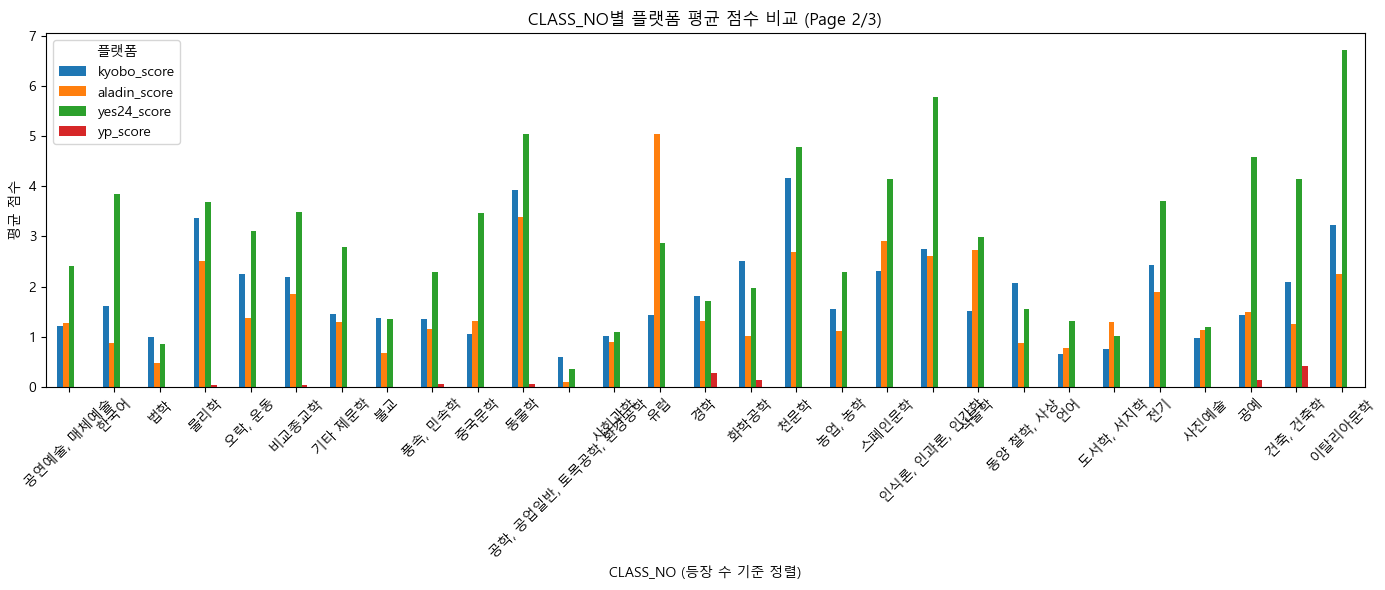

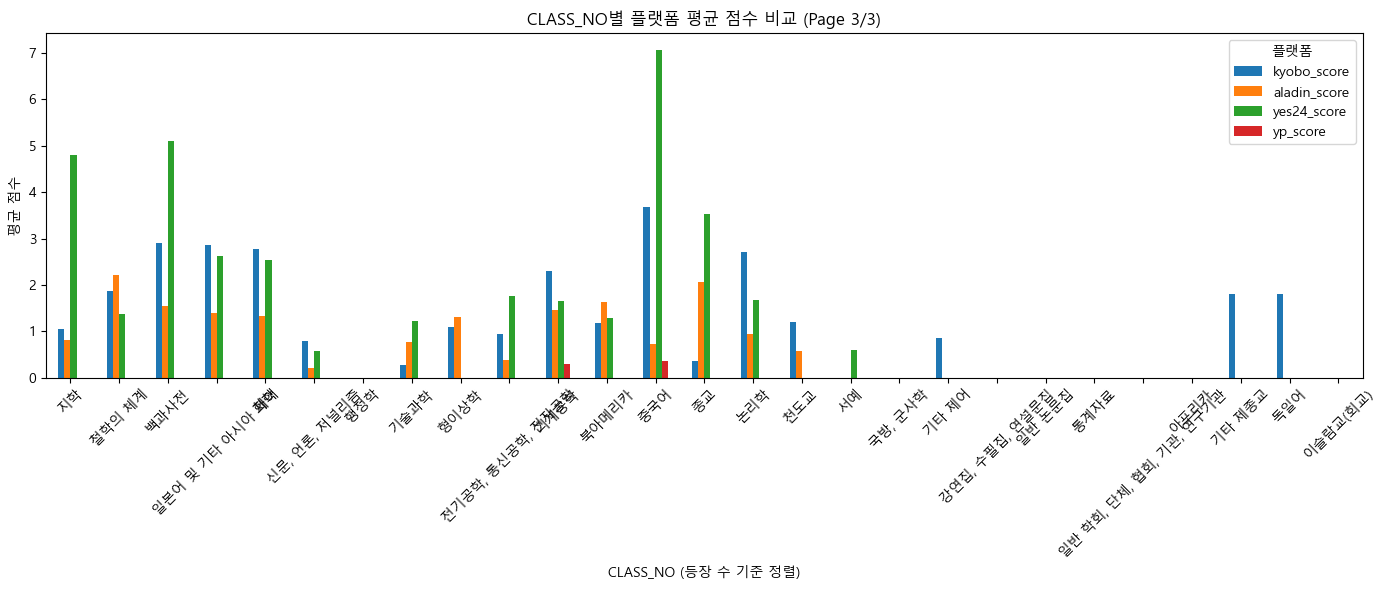

In [109]:
# 비베스트
import matplotlib.pyplot as plt
import math

# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 등장 수 기준으로 CLASS_NO 정렬
# -> 원본 df에서 CLASS_NO별 등장 횟수 계산
class_counts = df1['CLASS_NO'].value_counts()

# -> genre_score_by_platform 재정렬
genre_score_sorted1 = genre_score_by_platform1.loc[class_counts.index.intersection(genre_score_by_platform.index)]
genre_score_sorted1 = genre_score_sorted1.reindex(class_counts.index)

# ✅ 페이지 나누기 설정
n_pages = 3
total_rows = len(genre_score_sorted1)
rows_per_page = math.ceil(total_rows / n_pages)

# ✅ 페이지별 시각화
for page in range(n_pages):
    start_idx = page * rows_per_page
    end_idx = min(start_idx + rows_per_page, total_rows)

    sliced = genre_score_sorted1.iloc[start_idx:end_idx]

    # 그래프 그리기
    sliced.plot(kind='bar', figsize=(14, 6))
    plt.title(f'CLASS_NO별 플랫폼 평균 점수 비교 (Page {page+1}/{n_pages})')
    plt.ylabel('평균 점수')
    plt.xlabel('CLASS_NO (등장 수 기준 정렬)')
    plt.xticks(rotation=45)
    plt.legend(title='플랫폼')
    plt.tight_layout()
    plt.show()

- 비베스트
반대로 비베스트셀러의 경우 대부분의 경우 yes 24가 우세
도서학, 문학, 북아메리카, 유럽, 철학의 체계, 형이상학은 aladin이 우세함(하지만 큰 차이를 보여주진 않음)
총 24개의 장르가 교보가 우세하지만, 그차이는 2등과 미미한 수준(2점 이상 차이 나지 않음)
가정학, 건축, 지리, 총류, 한국어 등 대중적인? 장르는 yes24가 우세한 모습을 보여줌(2점 이상차이 남)

-> 비베스트셀러의 경우 yes24에서 점수가 높은편, 베스트셀러에 비해 점수 차가 적은편(2점 이상차이)이지만 베스트셀러를 목적으로 하는 도서가 아닐 경우 장르에 맞게 플랫폼별로 상대적으로 투자를 한다면 더 좋은 성과를 얻을 가능성이 상대적으로 높음
-> 약간 특이사항으로 몇몇 장르를 제외한 대부분의 장르에서 yes24는 고객들의 만족도가 일정한 수준을 보여줌

In [139]:
ranked_df1

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,가정학 및 가정생활,yes24,8.59,kyobo,3.78,aladin,2.75,yp,0.08
1,"강연집, 수필집, 연설문집",kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
2,"건축, 건축학",yes24,4.14,kyobo,2.10,aladin,1.25,yp,0.41
3,경제학,yes24,6.04,aladin,4.90,kyobo,2.99,yp,0.08
4,경학,kyobo,1.81,yes24,1.72,aladin,1.31,yp,0.27
...,...,...,...,...,...,...,...,...,...
80,행정학,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
81,형이상학,aladin,1.31,kyobo,1.09,yes24,0.00,yp,0.00
82,화학,kyobo,2.78,yes24,2.54,aladin,1.34,yp,0.00
83,화학공학,kyobo,2.51,yes24,1.97,aladin,1.01,yp,0.13


In [140]:
ranked_df1['1위'].value_counts()

1위
yes24     55
kyobo     24
aladin     6
Name: count, dtype: int64

In [141]:
ranked_df1[ranked_df1['1위'] == 'aladin']

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
18,"도서학, 서지학",aladin,1.30,yes24,1.02,kyobo,0.76,yp,0.00
23,문학,aladin,9.13,yes24,8.58,kyobo,3.22,yp,0.07
28,북아메리카,aladin,1.63,yes24,1.28,kyobo,1.18,yp,0.00
50,유럽,aladin,5.05,yes24,2.87,kyobo,1.43,yp,0.00
73,철학의 체계,aladin,2.22,kyobo,1.87,yes24,1.37,yp,0.00
81,형이상학,aladin,1.31,kyobo,1.09,yes24,0.00,yp,0.00


In [142]:
ranked_df1[ranked_df1['1위'] == 'kyobo']

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
1,"강연집, 수필집, 연설문집",kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
4,경학,kyobo,1.81,yes24,1.72,aladin,1.31,yp,0.27
7,"공학, 공업일반, 토목공학, 환경공학",kyobo,0.59,yes24,0.36,aladin,0.09,yp,0.00
9,"국방, 군사학",kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
10,기계공학,kyobo,2.31,yes24,1.65,aladin,1.45,yp,0.30
14,기타 제어,kyobo,0.85,aladin,0.00,yes24,0.00,yp,0.00
15,기타 제종교,kyobo,1.80,aladin,0.00,yes24,0.00,yp,0.00
16,논리학,kyobo,2.71,yes24,1.68,aladin,0.95,yp,0.00
20,독일어,kyobo,1.80,aladin,0.00,yes24,0.00,yp,0.00
22,"동양 철학, 사상",kyobo,2.07,yes24,1.55,aladin,0.88,yp,0.00


In [144]:
filtered = ranked_df1[
    (ranked_df1['1위'] == 'yes24') &
    ((ranked_df1['1위점수'] - ranked_df1['2위점수']).abs() >= 2)
]

print(filtered)


         CLASS_NO     1위   1위점수      2위  2위점수      3위  3위점수  4위  4위점수
0      가정학 및 가정생활  yes24   8.59   kyobo  3.78  aladin  2.75  yp  0.08
2         건축, 건축학  yes24   4.14   kyobo  2.10  aladin  1.25  yp  0.41
6              공예  yes24   4.59  aladin  1.50   kyobo  1.43  yp  0.14
8             교육학  yes24   3.43   kyobo  1.42  aladin  1.27  yp  0.02
24          문헌정보학  yes24  10.69  aladin  4.12   kyobo  3.92  yp  0.16
26           백과사전  yes24   5.11   kyobo  2.90  aladin  1.54  yp  0.00
45             역사  yes24   7.49   kyobo  3.28  aladin  2.55  yp  0.02
46           영미문학  yes24   5.73  aladin  3.54   kyobo  2.42  yp  0.07
47             영어  yes24   6.73  aladin  3.18   kyobo  2.91  yp  0.03
51      윤리학, 도덕철학  yes24   8.33   kyobo  3.52  aladin  3.45  yp  0.03
55         이탈리아문학  yes24   6.72   kyobo  3.23  aladin  2.26  yp  0.00
56  인식론, 인과론, 인간학  yes24   5.78   kyobo  2.76  aladin  2.62  yp  0.00
59           일본문학  yes24  11.59  aladin  4.94   kyobo  3.85  yp  0.07
61           자연과학  y

In [146]:
ranked_df[ranked_df['1위'] == 'kyobo']

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
2,"건축, 건축학",kyobo,25.40,yes24,15.05,aladin,8.81,yp,0.47
3,경제학,kyobo,36.20,yes24,23.53,aladin,12.15,yp,0.45
4,경학,kyobo,37.89,yes24,19.73,aladin,7.90,yp,0.22
6,공예,kyobo,38.21,yes24,27.31,aladin,9.77,yp,0.48
7,"공학, 공업일반, 토목공학, 환경공학",kyobo,22.64,yes24,16.20,aladin,12.21,yp,0.22
...,...,...,...,...,...,...,...,...,...
79,한국어,kyobo,44.18,yes24,9.68,aladin,6.64,yp,0.67
80,행정학,kyobo,16.11,aladin,10.97,yes24,6.32,yp,0.22
81,형이상학,kyobo,13.14,aladin,5.96,yes24,3.50,yp,0.00
83,화학공학,kyobo,10.86,yes24,8.99,aladin,7.90,yp,0.21


In [147]:
ranked_df.describe()

,1위점수,2위점수,3위점수,4위점수
count,85.000000,85.000000,85.000000,85.000000
mean,26.875176,16.164706,10.332588,0.327059
std,24.053516,9.359713,5.513459,0.892470
min,3.750000,1.800000,0.000000,0.000000
25%,16.060000,10.970000,6.640000,0.030000
50%,25.270000,15.760000,9.810000,0.200000
75%,32.880000,19.860000,13.200000,0.340000
max,222.960000,79.580000,34.400000,8.200000


- 베스트
대부분의 장르에서 교보문고가 우세한 모습
가정학, 강연집, 기계공학, 기타 제종교, 농업, 독일어, 문헌정보학, 스페인 문학, 언어, 유럽, 일반 논문집, 종교, 중국어, 철학의 체계, 화학 분야는 yes24가 우세함
이 중 강연집, 기타 제종교, 언어, 일반 논문집, 종교, 중국어 의 경우 yes24가 많이 우세함(2위랑 감성점수 4점 이상 차이)
공연예술, 국방, 도서학, 사진예술, 식물학, 음악, 이슬람굑, 일반학회 장르는 aladin이 우세
이 중 국방, 식물학, 일반 학회의 경우 aladin이 많이 우세(2위랑 감성점수 3.5점 이상 차이)

-> 사람들이 많이 찾는 도서의 경우 대부분 교보문고에서 베스트셀러가 많이 나옴(이 도서들의 경우 점수 차가 4점 이상차이, 몇십점씩 차이나는 도서 장르도 존재함)
-> 반면 상대적으로 덜 찾는 장르의 도서는 yes24, aladin에서도 베스트셀러가 나오며 점수 또한 좋음
-> 베스트셀러가 목적인 도서의 경우 교보문고의 우선투자는 필수이고 다른 플랫폼도 투자할 필요성 높음, 하지만 플랫폼별 베스트셀러 데이터를 조금 더 살펴봐야 할 필요성


- 비베스트
반대로 비베스트셀러의 경우 대부분의 경우 yes 24가 우세
도서학, 문학, 북아메리카, 유럽, 철학의 체계, 형이상학은 aladin이 우세함(하지만 큰 차이를 보여주진 않음)
총 24개의 장르가 교보가 우세하지만, 그차이는 2등과 미미한 수준(2점 이상 차이 나지 않음)
가정학, 건축, 지리, 총류, 한국어 등 대중적인? 장르는 yes24가 우세한 모습을 보여줌(2점 이상차이 남)

-> 비베스트셀러의 경우 yes24에서 점수가 높은편, 베스트셀러에 비해 점수 차가 적은편(2점 이상차이)이지만 베스트셀러를 목적으로 하는 도서가 아닐 경우 장르에 맞게 플랫폼별로 상대적으로 투자를 한다면 더 좋은 성과를 얻을 가능성이 상대적으로 높음
-> 약간 특이사항으로 몇몇 장르를 제외한 대부분의 장르에서 yes24는 고객들의 만족도가 일정한 수준을 보여줌


-> 감성점수 1점당 어느정도의 차이를 보여주는지 판단할 지표가 있어야 할듯


## 출판시기별 점수

In [116]:
# 베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. PUBLER_YEAR별 평균 점수 계산
pubyear_score_by_platform = df.groupby('PUBLER_YEAR')[platform_scores].mean().round(2)

# 3. 각 PUBLER_YEAR별로 플랫폼 점수 정렬 및 순위 저장
ranked_results_by_py = []

for pub_year, row in pubyear_score_by_platform.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results_by_py.append({
        'PUBLER_YEAR': pub_year,  # ✅ 여기를 수정
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환
ranked_by_py = pd.DataFrame(ranked_results_by_py)

# 5. 출판연도 기준 정렬
ranked_by_py = ranked_by_py.sort_values('PUBLER_YEAR')

# 6. 출력
ranked_by_py

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,1981,yes24,52.65,aladin,45.11,kyobo,38.88,yp,0.00
1,1993,kyobo,22.05,yes24,21.08,aladin,0.90,yp,0.00
2,1994,aladin,101.13,kyobo,87.18,yp,8.08,yes24,0.00
3,1998,aladin,58.00,yes24,41.48,yp,0.90,kyobo,0.00
4,1999,aladin,80.28,yes24,62.05,yp,1.60,kyobo,0.00
5,2000,aladin,84.67,yes24,63.62,kyobo,38.64,yp,1.32
6,2001,aladin,120.28,kyobo,114.61,yes24,61.27,yp,1.92
7,2002,kyobo,71.82,aladin,70.84,yes24,55.88,yp,0.72
8,2003,aladin,117.84,yes24,58.31,kyobo,39.62,yp,1.00
9,2004,kyobo,106.47,aladin,63.68,yes24,51.77,yp,0.83


In [149]:
ranked_by_py['1위'].value_counts()

1위
kyobo     17
aladin    11
yes24      4
Name: count, dtype: int64

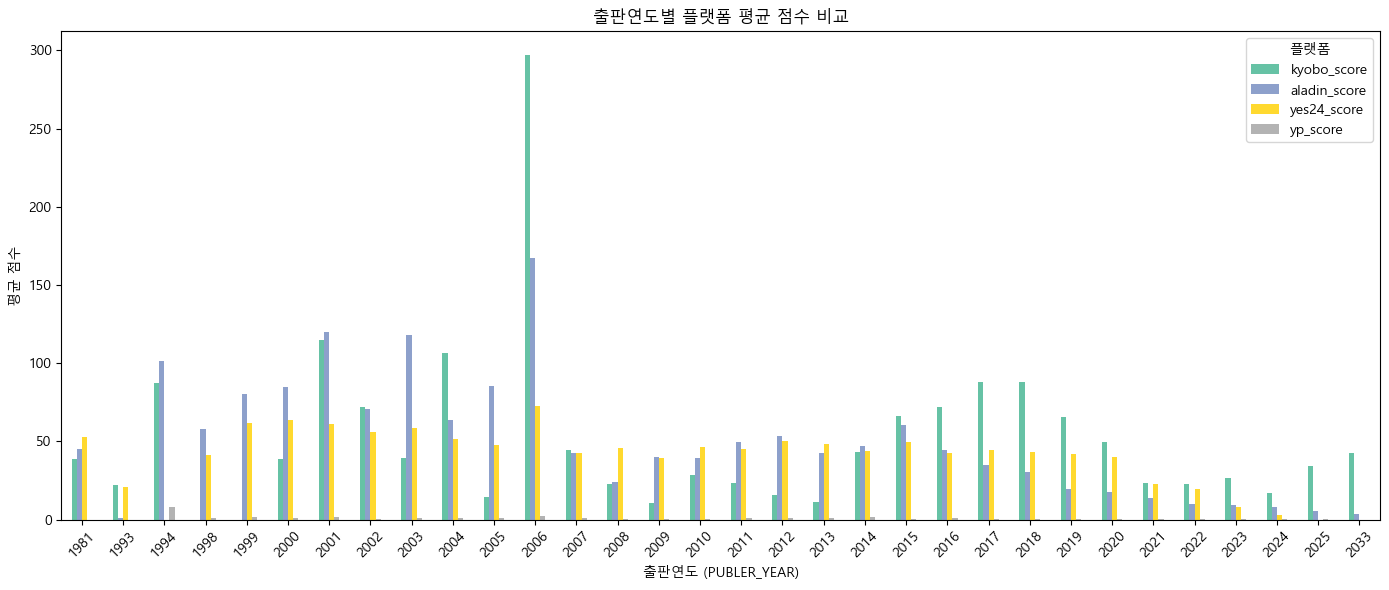

In [148]:
# 베스트
import matplotlib.pyplot as plt

# 출판연도별 플랫폼 점수 시각화
pubyear_score_by_platform.plot(kind='bar', figsize=(14, 6), colormap='Set2')

plt.title('출판연도별 플랫폼 평균 점수 비교')
plt.xlabel('출판연도 (PUBLER_YEAR)')
plt.ylabel('평균 점수')
plt.xticks(rotation=45)
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()

In [8]:
df[df['PUBLER_YEAR'] == 2006][['kyobo_score', 'yes24_score', 'aladin_score', 'yp_score', 'TITLE']]

,kyobo_score,yes24_score,aladin_score,yp_score,TITLE
204,0.00,72.20,127.44,1.8,예루살렘의 아이히만 :악의 평범성에 대한 보고서
1496,594.67,72.99,207.53,2.5,코스모스 :특별판


- 베스트셀러
출판년도별 점수 또한 대부분 교보가 우세(53%)
특이사항으로 2006년도에 압도적으로 높은 점수를 가진 도서가 교보에 있음, -> 해당 도서확인 필요(코스모스 특별판)
1981, 2008, 2010, 2013년도에 yes24가 압도적으로 우세함(6점 이상차이)
총 11개의 년도에서 알라딘이 우세함(3점 이상 차이), 또한 압도적으로 우세한 년도 존재(1994, 1998, 1999, 2000, 2003, 2005), 해당 년도들은 알라딘이 2위랑 최소 17점 차이남
특이사항으로 알라딘이 우세한 11개의 년도에서 2위는 yes24가 9번, kyobo가 2번
다만, 20년도 부터 25년까지 출판한 책들의 데이터의 경우 교보가 많이 우세함
즉, 최신 베스트셀러 도서들의 경우 교보에서 고객들이 좋은 평가를 함

-> 이것으로 보아 각 출판년도 도서별로 고객들의 만족도가 높은 도서가 교보문고, 알라딘, 예사 골고루 존재함
-> 최신 베스트셀러들의 경우 교보가 이를 잘 캐치하거나 도서 흥행을 위해 교보 자체적으로 마케팅에 힘을 실을 가능성 있음
-> 새로운 책을 출판한다면 교보를 우선 투저하애함(베스트셀러가 목적이라면)
-> 다만 새로운 책이 아닌 예전 책을 편집하거나 하는 등의 도서를 출판한다면 꼭 교보 중심으로 투자보다는 교보, 알라딘을 중심으로 적절하게 분배해서 투자하는 것이 좋다고 판단됨

In [150]:
filtered1 = ranked_by_py[
    (ranked_by_py['1위'] == 'yes24') &
    ((ranked_by_py['1위점수'] - ranked_by_py['2위점수']).abs() >= 2)
]

print(filtered1)

   PUBLER_YEAR     1위   1위점수      2위   2위점수     3위   3위점수  4위  4위점수
0         1981  yes24  52.65  aladin  45.11  kyobo  38.88  yp  0.00
13        2008  yes24  46.13  aladin  23.95  kyobo  22.92  yp  0.58
15        2010  yes24  46.48  aladin  39.17  kyobo  28.71  yp  0.70
18        2013  yes24  48.45  aladin  42.80  kyobo  11.39  yp  0.81


In [152]:
ranked_by_py[ranked_by_py['1위'] == 'yes24']

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,1981,yes24,52.65,aladin,45.11,kyobo,38.88,yp,0.00
13,2008,yes24,46.13,aladin,23.95,kyobo,22.92,yp,0.58
15,2010,yes24,46.48,aladin,39.17,kyobo,28.71,yp,0.70
18,2013,yes24,48.45,aladin,42.80,kyobo,11.39,yp,0.81


In [153]:
ranked_by_py[ranked_by_py['1위'] == 'aladin']

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
2,1994,aladin,101.13,kyobo,87.18,yp,8.08,yes24,0.00
3,1998,aladin,58.00,yes24,41.48,yp,0.90,kyobo,0.00
4,1999,aladin,80.28,yes24,62.05,yp,1.60,kyobo,0.00
5,2000,aladin,84.67,yes24,63.62,kyobo,38.64,yp,1.32
6,2001,aladin,120.28,kyobo,114.61,yes24,61.27,yp,1.92
8,2003,aladin,117.84,yes24,58.31,kyobo,39.62,yp,1.00
10,2005,aladin,85.34,yes24,47.69,kyobo,14.29,yp,1.28
14,2009,aladin,39.86,yes24,39.67,kyobo,10.88,yp,0.63
16,2011,aladin,49.90,yes24,45.18,kyobo,23.53,yp,0.97
17,2012,aladin,53.50,yes24,50.41,kyobo,15.49,yp,0.78


In [154]:
ranked_by_py[ranked_by_py['1위'] == 'kyobo']

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
1,1993,kyobo,22.05,yes24,21.08,aladin,0.90,yp,0.00
7,2002,kyobo,71.82,aladin,70.84,yes24,55.88,yp,0.72
9,2004,kyobo,106.47,aladin,63.68,yes24,51.77,yp,0.83
11,2006,kyobo,297.33,aladin,167.48,yes24,72.60,yp,2.15
12,2007,kyobo,44.42,aladin,42.88,yes24,42.40,yp,0.97
20,2015,kyobo,66.54,aladin,60.57,yes24,49.51,yp,0.57
21,2016,kyobo,71.82,aladin,44.38,yes24,42.64,yp,1.19
22,2017,kyobo,87.80,yes24,44.56,aladin,35.18,yp,0.67
23,2018,kyobo,87.84,yes24,43.23,aladin,30.60,yp,0.60
24,2019,kyobo,65.60,yes24,42.08,aladin,19.62,yp,0.45


- 베스트셀러
출판년도별 점수 또한 대부분 교보가 우세(53%)
1981, 2008, 2010, 2013년도에 yes24가 압도적으로 우세함(6점 이상차이)
총 11개의 년도에서 알라딘이 우세함(3점 이상 차이), 또한ㄴ 압도적으로 우세한 년도 존재(1994, 1998, 1999, 2000, 2003, 2005), 해당 년도들은 알라딘이 2위랑 최소 17점 차이남
특이사항으로 알라딘이 우세한 11개의 년도에서 2위는 yes24가 9번, kyobo가 2번
다만, 20년도 부터 25년까지 출판한 책들의 데이터의 경우 교보가 많이 우세함
즉, 최신 베스트셀러 도서들의 경우 교보에서 고객들이 좋은 평가를 함

-> 이것으로 보아 각 출판년도 도서별로 고객들의 만족도가 높은 도서가 교보문고, 알라딘, 예사 골고루 존재함
-> 새로운 책을 출판한다면 교보를 우선 투저하애함(베스트셀러가 목적이라면)
-> 다만 새로운 책이 아닌 예전 책을 편집하거나 하는 등의 도서를 출판한다면 꼭 교보 중심으로 투자보다는 교보, 알라딘을 중심으로 적절하게 분배해서 투자하는 것이 좋다고 판단됨

In [117]:
# 비베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. PUBLER_YEAR별 평균 점수 계산
pubyear_score_by_platform1 = df1.groupby('PUBLER_YEAR')[platform_scores].mean().round(2)

# 3. 각 PUBLER_YEAR별로 플랫폼 점수 정렬 및 순위 저장
ranked_results_by_py = []

for pub_year, row in pubyear_score_by_platform1.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results_by_py.append({
        'PUBLER_YEAR': pub_year,  # ✅ 여기를 수정
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환
ranked_by_py1 = pd.DataFrame(ranked_results_by_py)

# 5. 출판연도 기준 정렬
ranked_by_py1 = ranked_by_py1.sort_values('PUBLER_YEAR')

# 6. 출력
ranked_by_py1

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
1,1961,yes24,3.03,kyobo,0.00,aladin,0.00,yp,0.00
2,1967,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
3,1968,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
4,1970,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
5,1982,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
6,1985,yes24,1.70,kyobo,0.00,aladin,0.00,yp,0.00
7,1986,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
8,1989,kyobo,1.80,aladin,0.00,yes24,0.00,yp,0.00
9,1992,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00


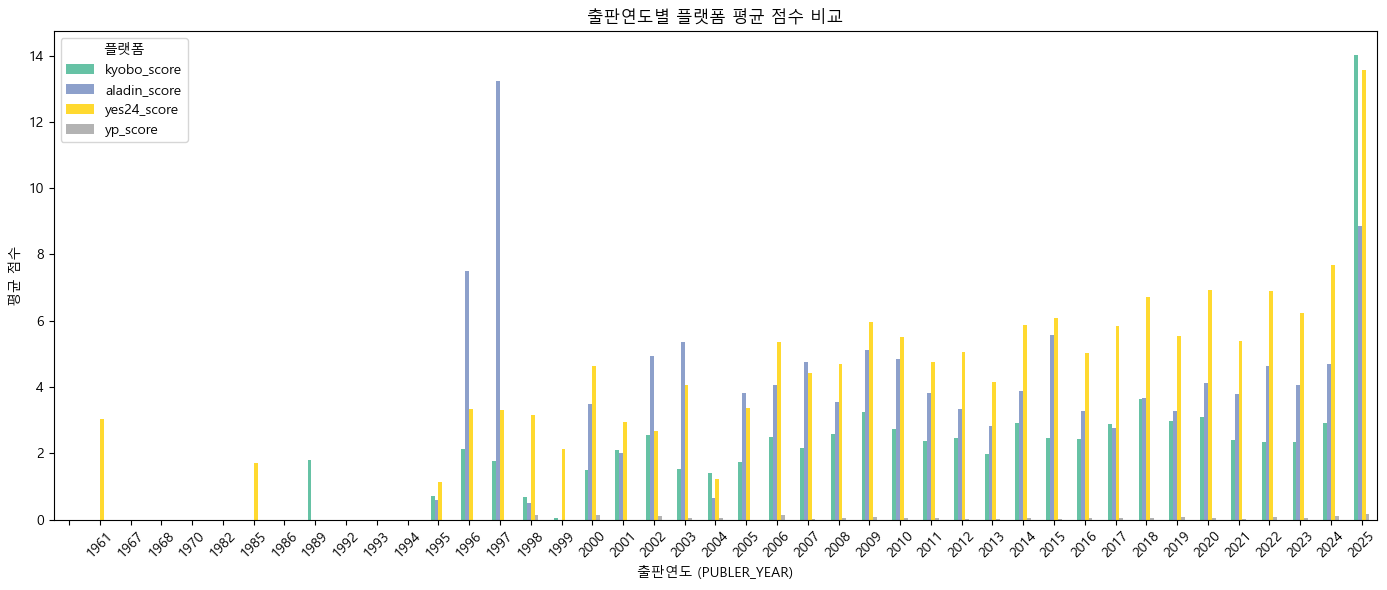

In [119]:
# 비베스트
import matplotlib.pyplot as plt

# 출판연도별 플랫폼 점수 시각화
pubyear_score_by_platform1.plot(kind='bar', figsize=(14, 6), colormap='Set2')

plt.title('출판연도별 플랫폼 평균 점수 비교')
plt.xlabel('출판연도 (PUBLER_YEAR)')
plt.ylabel('평균 점수')
plt.xticks(rotation=45)
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()

- 비베스트셀러
당연한 얘기지만 비베스트셀러의 경우 상대적으로 최신 책들이 많음
대부분 yes24가 우세(58%), 특히 20~24년까지 최신 책들에 대한 고객평가가 좋음, 2위랑 차이 자체는 많은 차이를 보여주지 않음(1~2점차이)
kyobo는 25년도에 우세한 모습, 하지만 2위랑 0.4정도의 차이, 상대적으로 매우 근소함
특이사항으로 2위 대부분이 aladin으로 1위와 그렇게 큰차이를 보여주지 않았음

-> yes24는 최근 출간한 도서에 대해 좋은 고객 반응 다수, 비베스트셀러에서 강세를 보이며 꾸준하게 고객들에게 좋은 반응을 얻어내고 있음
-> 알라딘은 1위와 큰 차이가 존재하지 않으며 일정 수준을 유지
-> 교보는 영풍을 제외하고 비베스트셀러에서 상대적으로 약세를 보임, 타 플랫폼에 비해 비베스트셀러에 한해서는 고객들의 참여?가 이루어지지 않고 있음

In [155]:
ranked_by_py1['1위'].value_counts()

1위
yes24     25
kyobo     12
aladin     6
Name: count, dtype: int64

In [158]:
ranked_by_py1['2위'].value_counts()

2위
aladin    28
yes24      8
kyobo      7
Name: count, dtype: int64

In [157]:
ranked_by_py1[ranked_by_py1['1위'] == 'yes24']

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
1,1961,yes24,3.03,kyobo,0.00,aladin,0.00,yp,0.00
6,1985,yes24,1.70,kyobo,0.00,aladin,0.00,yp,0.00
12,1995,yes24,1.13,kyobo,0.72,aladin,0.60,yp,0.00
15,1998,yes24,3.17,kyobo,0.67,aladin,0.50,yp,0.14
16,1999,yes24,2.14,kyobo,0.06,aladin,0.00,yp,0.00
17,2000,yes24,4.63,aladin,3.48,kyobo,1.51,yp,0.14
18,2001,yes24,2.96,kyobo,2.10,aladin,2.00,yp,0.00
23,2006,yes24,5.37,aladin,4.06,kyobo,2.48,yp,0.14
25,2008,yes24,4.69,aladin,3.56,kyobo,2.57,yp,0.05
26,2009,yes24,5.97,aladin,5.12,kyobo,3.25,yp,0.07


In [161]:
ranked_by_py1[ranked_by_py1['1위'] == 'kyobo']

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
2,1967,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
3,1968,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
4,1970,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
5,1982,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
7,1986,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
8,1989,kyobo,1.80,aladin,0.00,yes24,0.00,yp,0.00
9,1992,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
10,1993,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
11,1994,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00


In [162]:
ranked_by_py1[ranked_by_py1['1위'] == 'aladin']

,PUBLER_YEAR,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
13,1996,aladin,7.49,yes24,3.33,kyobo,2.13,yp,0.00
14,1997,aladin,13.23,yes24,3.32,kyobo,1.76,yp,0.00
19,2002,aladin,4.94,yes24,2.68,kyobo,2.55,yp,0.10
20,2003,aladin,5.35,yes24,4.06,kyobo,1.52,yp,0.06
22,2005,aladin,3.82,yes24,3.36,kyobo,1.73,yp,0.00
24,2007,aladin,4.77,yes24,4.41,kyobo,2.17,yp,0.03


- 베스트셀러
출판년도별 점수 또한 대부분 교보가 우세(53%)
특이사항으로 2006년도에 압도적으로 높은 점수를 가진 도서가 교보에 있음, -> 해당 도서확인 필요(코스모스 특별판)
1981, 2008, 2010, 2013년도에 yes24가 압도적으로 우세함(6점 이상차이)
총 11개의 년도에서 알라딘이 우세함(3점 이상 차이), 또한 압도적으로 우세한 년도 존재(1994, 1998, 1999, 2000, 2003, 2005), 해당 년도들은 알라딘이 2위랑 최소 17점 차이남
특이사항으로 알라딘이 우세한 11개의 년도에서 2위는 yes24가 9번, kyobo가 2번
다만, 20년도 부터 25년까지 출판한 책들의 데이터의 경우 교보가 많이 우세함
즉, 최신 베스트셀러 도서들의 경우 교보에서 고객들이 좋은 평가를 함

-> 이것으로 보아 각 출판년도 도서별로 고객들의 만족도가 높은 도서가 교보문고, 알라딘, 예사 골고루 존재함
-> 최신 베스트셀러들의 경우 교보가 이를 잘 캐치하거나 도서 흥행을 위해 교보 자체적으로 마케팅에 힘을 실을 가능성 있음
-> 새로운 책을 출판한다면 교보를 우선 투저하애함(베스트셀러가 목적이라면)
-> 다만 새로운 책이 아닌 예전 책을 편집하거나 하는 등의 도서를 출판한다면 꼭 교보 중심으로 투자보다는 교보, 알라딘을 중심으로 적절하게 분배해서 투자하는 것이 좋다고 판단됨


- 비베스트셀러
당연한 얘기지만 비베스트셀러의 경우 상대적으로 최신 책들이 많음
대부분 yes24가 우세(58%), 특히 20~24년까지 최신 책들에 대한 고객평가가 좋음, 2위랑 차이 자체는 많은 차이를 보여주지 않음(1~2점차이)
kyobo는 25년도에 우세한 모습, 하지만 2위랑 0.4정도의 차이, 상대적으로 매우 근소함
특이사항으로 2위 대부분이 aladin으로 1위와 그렇게 큰차이를 보여주지 않았음

-> yes24는 최근 출간한 도서에 대해 좋은 고객 반응 다수, 비베스트셀러에서 강세를 보이며 꾸준하게 고객들에게 좋은 반응을 얻어내고 있음
-> 알라딘은 1위와 큰 차이가 존재하지 않으며 일정 수준을 유지
-> 교보는 영풍을 제외하고 비베스트셀러에서 상대적으로 약세를 보임, 타 플랫폼에 비해 비베스트셀러에 한해서는 고객들의 참여?가 이루어지지 않고 있음


## 저자별 점수

In [9]:
# 베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. 저자별 등장 횟수 계산
author_counts = df['AUTHOR'].value_counts()

# 3. 저자별 평균 점수 계산
author_score_by_platform = df.groupby('AUTHOR')[platform_scores].mean().round(2)

# 4. 등장횟수를 데이터프레임으로 변환하고 합치기
author_counts_df = author_counts.rename('등장횟수').to_frame()
author_summary = author_score_by_platform.join(author_counts_df)

# 5. 등장횟수 내림차순 정렬
author_summary_sorted = author_summary.sort_values(by='등장횟수', ascending=False)

# 6. 결과 출력
author_summary_sorted

,kyobo_score,aladin_score,yes24_score,yp_score,등장횟수
AUTHOR,,,,,
설민석,106.33,22.76,31.13,0.48,50
히로시마 레이코,60.90,8.63,34.19,0.17,48
히가시노 게이고,80.01,33.18,39.85,1.06,34
흔한남매,111.11,6.09,5.49,3.08,32
김미영,80.14,6.10,33.82,0.21,26
...,...,...,...,...,...
히조,18.53,1.80,0.00,0.00,1
히토 슈타이얼,5.27,2.90,0.00,0.00,1
힐러리 로댐 클린턴,7.39,10.08,47.92,0.00,1


In [11]:
# 시각화용 한글폰트 설치(로컬 기준)

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

<Figure size 1400x700 with 0 Axes>

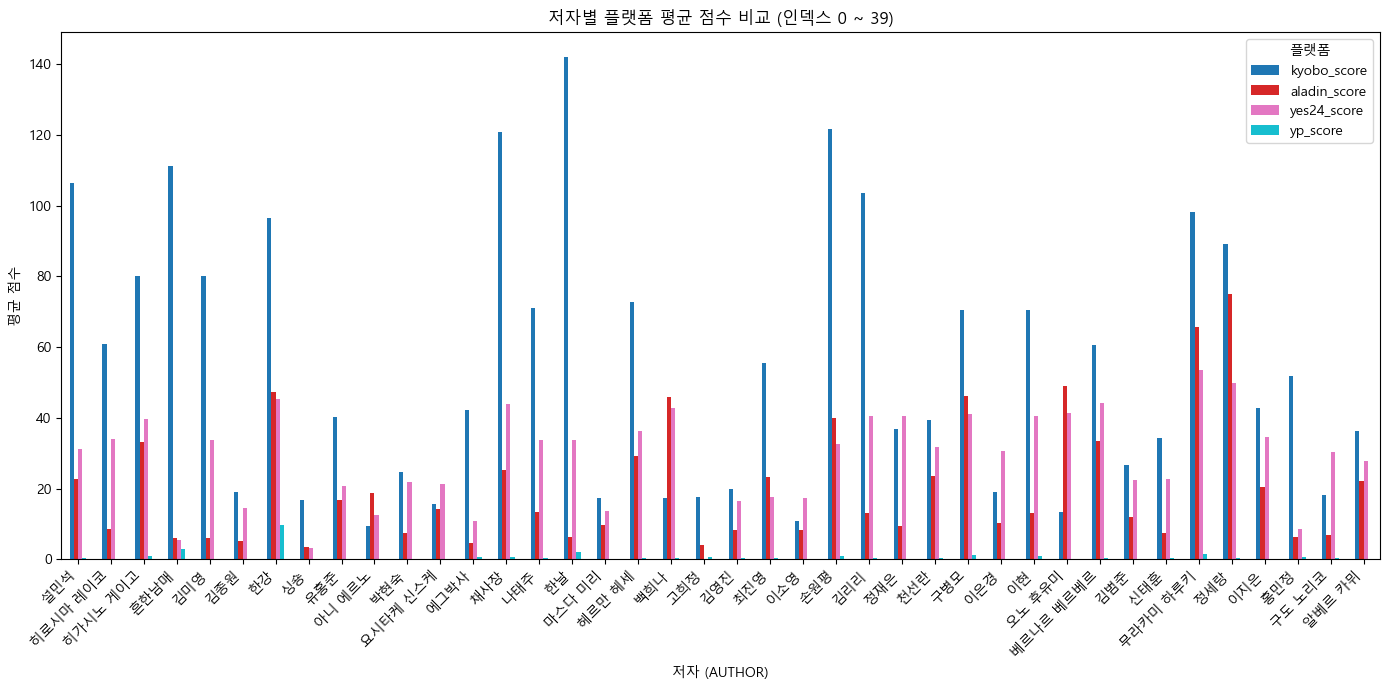

In [13]:
import matplotlib.pyplot as plt

# 슬라이싱 범위 설정 (예: 0 ~ 9번째 저자)
start_idx = 0
end_idx = 40

# 슬라이싱된 데이터
sliced_author_summary = author_summary_sorted.iloc[start_idx:end_idx]

# 플랫폼 점수 열들
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 그래프 크기 설정
plt.figure(figsize=(14, 7))

# 막대그래프 그리기
sliced_author_summary[platform_scores].plot(kind='bar', stacked=False, figsize=(14, 7), colormap='tab10')

plt.title(f'저자별 플랫폼 평균 점수 비교 (인덱스 {start_idx} ~ {end_idx - 1})')
plt.xlabel('저자 (AUTHOR)')
plt.ylabel('평균 점수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()

In [25]:
# 7. 저자별로 가장 높은 점수를 받은 플랫폼 열 이름을 찾아 새로운 열로 추가
author_summary_sorted['최고점_플랫폼'] = author_summary_sorted[platform_scores].idxmax(axis=1)

# 8. 결과 확인
author_summary_sorted


,kyobo_score,aladin_score,yes24_score,yp_score,등장횟수,최고점_플랫폼
AUTHOR,,,,,,
설민석,106.33,22.76,31.13,0.48,50,kyobo_score
히로시마 레이코,60.90,8.63,34.19,0.17,48,kyobo_score
히가시노 게이고,80.01,33.18,39.85,1.06,34,kyobo_score
흔한남매,111.11,6.09,5.49,3.08,32,kyobo_score
김미영,80.14,6.10,33.82,0.21,26,kyobo_score
...,...,...,...,...,...,...
히조,18.53,1.80,0.00,0.00,1,kyobo_score
히토 슈타이얼,5.27,2.90,0.00,0.00,1,kyobo_score
힐러리 로댐 클린턴,7.39,10.08,47.92,0.00,1,yes24_score


In [27]:
author_summary_sorted[author_summary_sorted['최고점_플랫폼'] == 'yes24_score']

,kyobo_score,aladin_score,yes24_score,yp_score,등장횟수,최고점_플랫폼
AUTHOR,,,,,,
요시타케 신스케,15.66,14.40,21.44,0.11,16,yes24_score
이소영,10.80,8.32,17.32,0.00,12,yes24_score
정재은,36.77,9.40,40.61,0.16,11,yes24_score
이은경,18.97,10.36,30.72,0.16,11,yes24_score
구도 노리코,18.36,7.01,30.24,0.36,10,yes24_score
...,...,...,...,...,...,...
나땅,0.00,17.90,28.69,0.00,1,yes24_score
히구치 유코,7.38,6.60,19.23,0.00,1,yes24_score
히로나카 헤이스케,52.83,49.94,58.33,0.00,1,yes24_score


- 베스트셀러
설민석, 히사시고 게이고, 한강 등 상대적으로 유명한 저자들 다수
대부분의 베스트셀러의 저자들의 경우 교보가 우세
전체 저자 수 6228명


In [28]:
# 비베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. 저자별 등장 횟수 계산
author_counts1 = df1['AUTHOR'].value_counts()

# 3. 저자별 평균 점수 계산
author_score_by_platform1 = df1.groupby('AUTHOR')[platform_scores].mean().round(2)

# 4. 등장횟수를 데이터프레임으로 변환하고 합치기
author_counts_df1 = author_counts1.rename('등장횟수').to_frame()
author_summary1 = author_score_by_platform1.join(author_counts_df1)

# 5. 등장횟수 내림차순 정렬
author_summary_sorted1 = author_summary1.sort_values(by='등장횟수', ascending=False)

# 6. 결과 출력
author_summary_sorted1

,kyobo_score,aladin_score,yes24_score,yp_score,등장횟수
AUTHOR,,,,,
고정욱,2.77,9.23,12.11,0.0,8
사이토 다카,3.81,10.18,15.57,0.0,8
윤동주,10.17,4.69,9.83,0.0,8
히가,18.74,30.41,33.16,0.0,8
서울,0.00,0.00,0.00,0.0,7
...,...,...,...,...,...
휴먼웍스,0.00,0.00,2.45,0.0,1
희망씨,0.00,0.00,0.00,0.0,1
희정,0.00,4.60,0.00,0.0,1


<Figure size 1400x700 with 0 Axes>

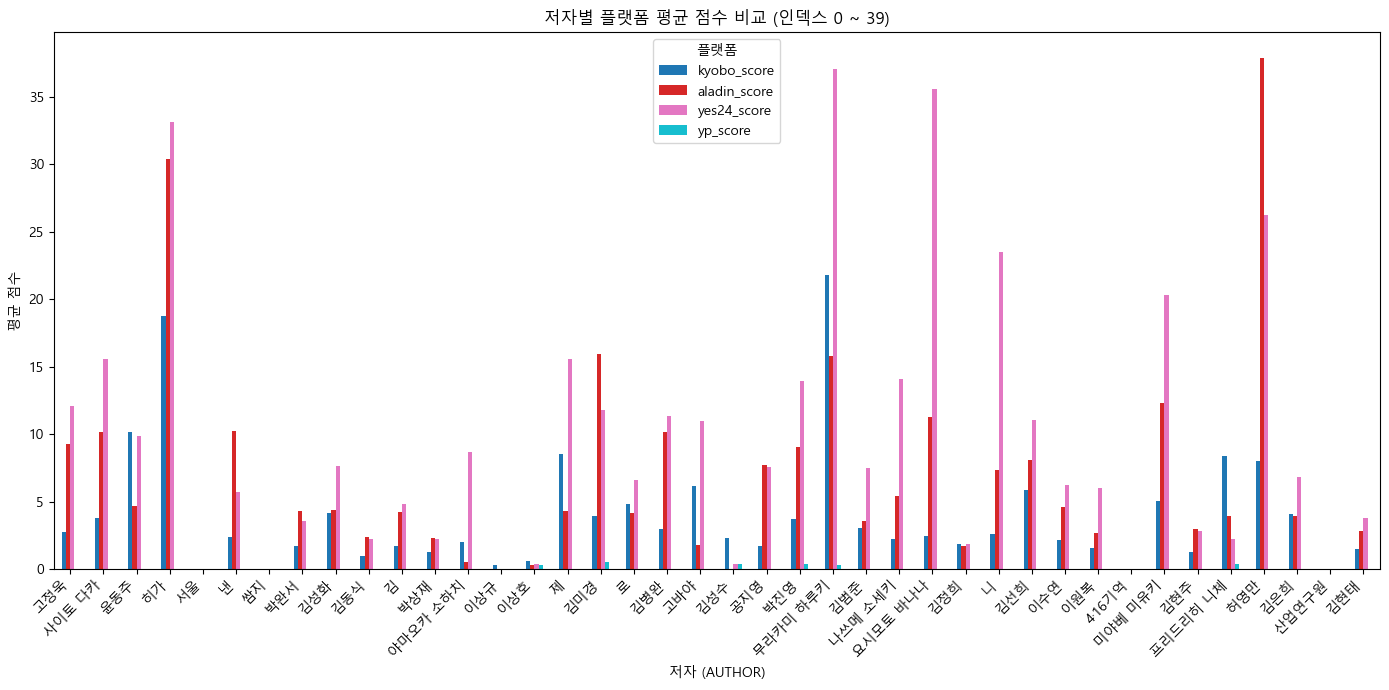

In [29]:
import matplotlib.pyplot as plt

# 슬라이싱 범위 설정 (예: 0 ~ 9번째 저자)
start_idx = 0
end_idx = 40

# 슬라이싱된 데이터
sliced_author_summary1 = author_summary_sorted1.iloc[start_idx:end_idx]

# 플랫폼 점수 열들
platform_scores1 = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 그래프 크기 설정
plt.figure(figsize=(14, 7))

# 막대그래프 그리기
sliced_author_summary1[platform_scores1].plot(kind='bar', stacked=False, figsize=(14, 7), colormap='tab10')

plt.title(f'저자별 플랫폼 평균 점수 비교 (인덱스 {start_idx} ~ {end_idx - 1})')
plt.xlabel('저자 (AUTHOR)')
plt.ylabel('평균 점수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()

In [169]:
# 전체 저자 수
total_authors_1 = len(author_summary_sorted.index)
total_authors_2 = len(author_summary_sorted1.index)

# 공통 저자
common_authors = author_summary_sorted.index.intersection(author_summary_sorted1.index)
common_count = len(common_authors)

# 공통 저자의 비율 계산
common_ratio_1 = common_count / total_authors_1 * 100
common_ratio_2 = common_count / total_authors_2 * 100

# 결과 출력
print(f"author_summary_sorted 저자 수: {total_authors_1}명")
print(f"author_summary_sorted1 저자 수: {total_authors_2}명")
print(f"공통 저자 수: {common_count}명")

print(f"공통 저자 비율 (author_summary_sorted 기준): {common_ratio_1:.2f}%")
print(f"공통 저자 비율 (author_summary_sorted1 기준): {common_ratio_2:.2f}%")



author_summary_sorted 저자 수: 6228명
author_summary_sorted1 저자 수: 8633명
공통 저자 수: 935명
공통 저자 비율 (author_summary_sorted 기준): 15.01%
공통 저자 비율 (author_summary_sorted1 기준): 10.83%


- 베스트셀러
설민석, 히사시고 게이고, 한강 등 상대적으로 유명한 저자들 다수
대부분의 베스트셀러의 저자들의 경우 교보가 우세
전체 저자 수 6228명

- 비베스트
전체 저자 수는 8633 명으로 베스트셀러보다 저자가 다양함
무라카미 하루키, 요시모토 바나나 등 몇몇 저자의 경우 yes24에서 매우 강세를 보여줌

-> 둘 사이의 공통 저자를 봤을 때 베스트 데이터 기준 15%가 겹침, 베스트셀러와 비베스트셀러간의 공통되지 않는 저자가 대다수이기에 베스트셀러의 경우 저자의 이름을 보고 고객들이 책을 구매하는 경향이 어느정도 있다고 판단됨, 이로 보아 베스트셀러 여부에 저자는 영향을 끼침


In [35]:
df[df['kyobo_review'] < 1]['kyobo_review']

1       0.0
23      0.0
24      0.0
25      0.0
26      0.0
       ... 
9713    0.0
9746    0.0
9763    0.0
9764    0.0
9803    0.0
Name: kyobo_review, Length: 620, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TITLE           9804 non-null   object 
 1   AUTHOR          9804 non-null   object 
 2   PUBLER          9804 non-null   object 
 3   CLASS_NO        9804 non-null   object 
 4   PUBLER_YEAR     9804 non-null   int64  
 5   PAGE            9804 non-null   float64
 6   ISBN            9804 non-null   int64  
 7   kyobo_best      9804 non-null   float64
 8   aladin_best     9804 non-null   float64
 9   yes24_best      9804 non-null   float64
 10  yp_best         9804 non-null   float64
 11  LOAN_COUNT      9804 non-null   float64
 12  E_BOOK          9804 non-null   object 
 13  kyobo_po        9804 non-null   float64
 14  kyobo_ne        9804 non-null   float64
 15  kyobo_pnscore   9804 non-null   float64
 16  kyobo_review    9804 non-null   float64
 17  kyobo_rating    9804 non-null   f

# 장르별 베스트셀러 등재율

In [38]:
df.columns

Index(['TITLE', 'AUTHOR', 'PUBLER', 'CLASS_NO', 'PUBLER_YEAR', 'PAGE', 'ISBN',
       'kyobo_best', 'aladin_best', 'yes24_best', 'yp_best', 'LOAN_COUNT',
       'E_BOOK', 'kyobo_po', 'kyobo_ne', 'kyobo_pnscore', 'kyobo_review',
       'kyobo_rating', 'kyobo_score', 'aladin_po', 'aladin_ne',
       'aladin_pnscore', 'aladin_review', 'aladin_rating', 'aladin_score',
       'yp_po', 'yp_ne', 'yp_pnscore', 'yp_review', 'yp_rating', 'yp_score',
       'yes24_po', 'yes24_ne', 'yes24_pnscore', 'yes24_review', 'yes24_rating',
       'yes24_score'],
      dtype='object')

In [45]:
# 대상 열 목록
best_columns = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']

# 각 열에 대해 1 이상이면 1로 바꾸기
df[best_columns] = df[best_columns].applymap(lambda x: 1 if x >= 1 else x)


C:\Users\user\AppData\Local\Temp\ipykernel_9456\2481285992.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[best_columns] = df[best_columns].applymap(lambda x: 1 if x >= 1 else x)


In [50]:
df.groupby('CLASS_NO')[['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']].count()

,kyobo_best,aladin_best,yes24_best,yp_best
CLASS_NO,,,,
가정학 및 가정생활,453,453,453,453
"강연집, 수필집, 연설문집",2,2,2,2
"건축, 건축학",13,13,13,13
경제학,1632,1632,1632,1632
경학,25,25,25,25
...,...,...,...,...
행정학,8,8,8,8
형이상학,6,6,6,6
화학,9,9,9,9


In [51]:
# 1. 플랫폼 베스트셀러 열 목록
best_columns = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']

# 2. CLASS_NO별 총 도서 수 계산
class_total = df.groupby('CLASS_NO').size().rename('total_count')

# 3. CLASS_NO별 베스트셀러 등재 수 합산
class_best_counts = df.groupby('CLASS_NO')[best_columns].sum()

# 4. CLASS_NO별 등재율 계산
class_best_ratio = class_best_counts.div(class_total, axis=0).round(3)

# 5. 등재율 데이터프레임에 CLASS_NO별 총 수 포함
class_best_ratio['total_count'] = class_total

# 6. 결과 확인
print(class_best_ratio.head())


                kyobo_best  aladin_best  yes24_best  yp_best  total_count
CLASS_NO                                                                 
가정학 및 가정생활           0.148        0.958       0.203    0.062          453
강연집, 수필집, 연설문집       0.500        1.000       0.500    0.000            2
건축, 건축학              0.231        0.923       0.077    0.231           13
경제학                  0.430        0.875       0.310    0.239         1632
경학                   0.680        0.760       0.320    0.080           25


In [72]:
# 베스트셀러 열 목록
best_columns = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']

# 장르별 (CLASS_NO) 각 플랫폼 베스트셀러 등재 수 합계
genre_best_counts = df.groupby('CLASS_NO')[best_columns].sum()

# 결과 확인
genre_best_counts


,kyobo_best,aladin_best,yes24_best,yp_best
CLASS_NO,,,,
가정학 및 가정생활,67.0,434.0,92.0,28.0
"강연집, 수필집, 연설문집",1.0,2.0,1.0,0.0
"건축, 건축학",3.0,12.0,1.0,3.0
경제학,702.0,1428.0,506.0,390.0
경학,17.0,19.0,8.0,2.0
...,...,...,...,...
행정학,1.0,7.0,1.0,0.0
형이상학,1.0,6.0,0.0,0.0
화학,0.0,9.0,1.0,0.0


In [61]:
genre_best_counts.to_csv('장르별_베스트셀러.csv', encoding='utf-8-sig')

In [ ]:
asd = pd.read_csv('장르별_베스트셀러.csv' )
asd

,CLASS_NO,kyobo_best,aladin_best,yes24_best,yp_best
0,가정학 및 가정생활,67.0,434.0,92.0,28.0
1,"강연집, 수필집, 연설문집",1.0,2.0,1.0,0.0
2,"건축, 건축학",3.0,12.0,1.0,3.0
3,경제학,702.0,1428.0,506.0,390.0
4,경학,17.0,19.0,8.0,2.0
...,...,...,...,...,...
80,행정학,1.0,7.0,1.0,0.0
81,형이상학,1.0,6.0,0.0,0.0
82,화학,0.0,9.0,1.0,0.0
83,화학공학,2.0,23.0,0.0,1.0


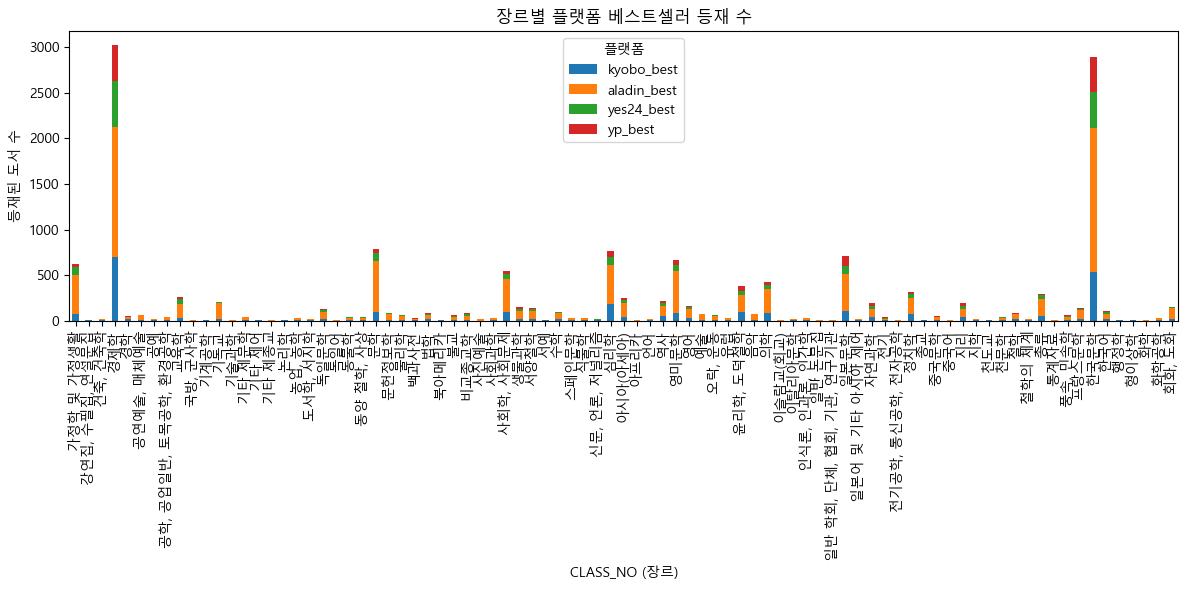

In [53]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (한글이 깨질 경우 대비)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac 사용 시

# 그래프 크기 설정
genre_best_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# 제목 및 축 라벨
plt.title('장르별 플랫폼 베스트셀러 등재 수')
plt.xlabel('CLASS_NO (장르)')
plt.ylabel('등재된 도서 수')
plt.legend(title='플랫폼')

# 출력
plt.tight_layout()
plt.show()


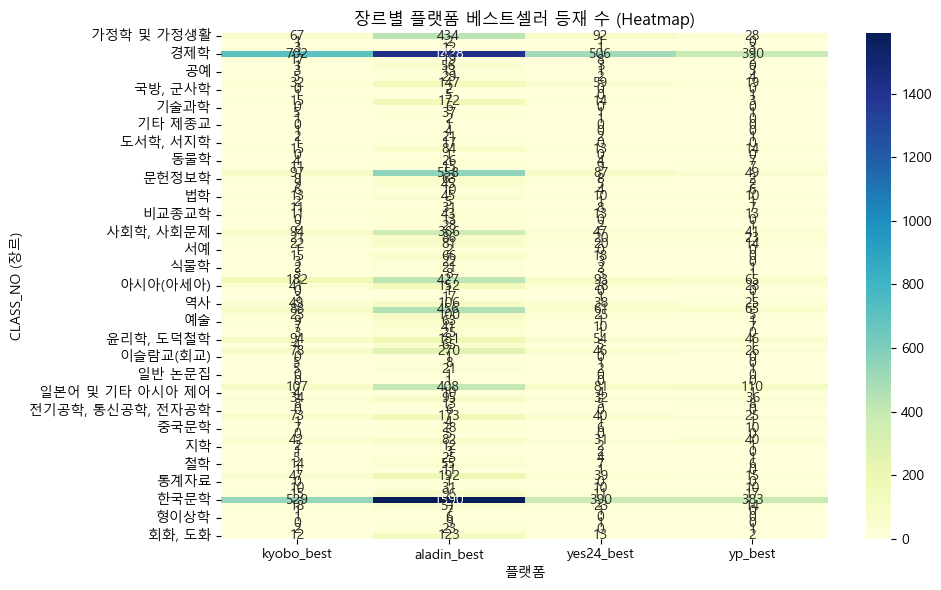

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(genre_best_counts, annot=True, fmt='g', cmap='YlGnBu')

# 제목 및 축 설정
plt.title('장르별 플랫폼 베스트셀러 등재 수 (Heatmap)')
plt.xlabel('플랫폼')
plt.ylabel('CLASS_NO (장르)')

plt.tight_layout()
plt.show()


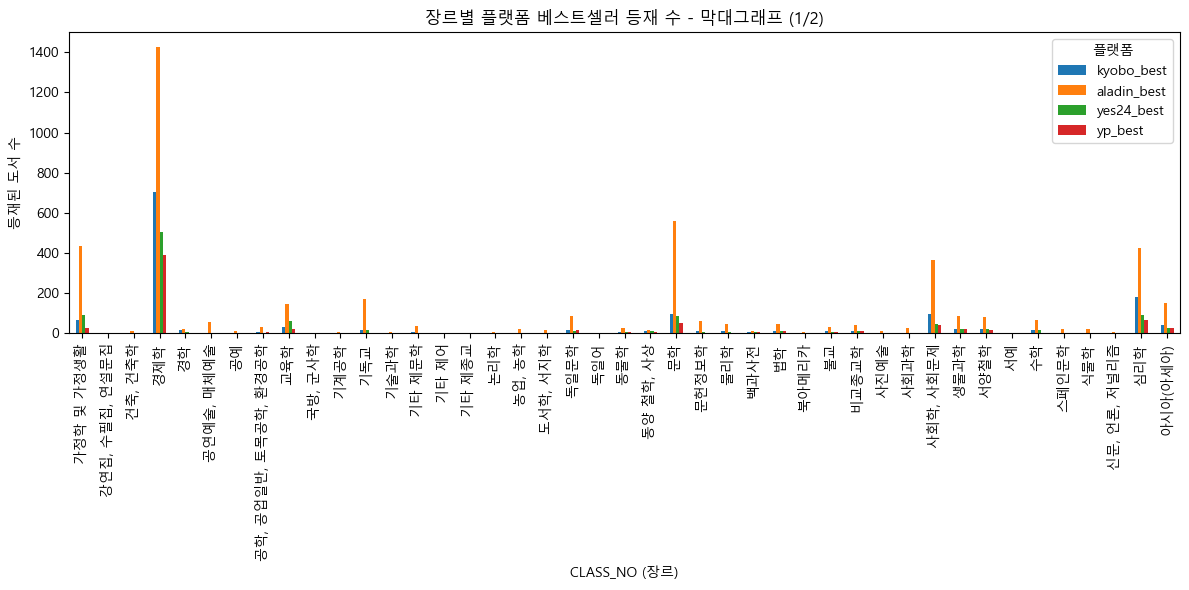

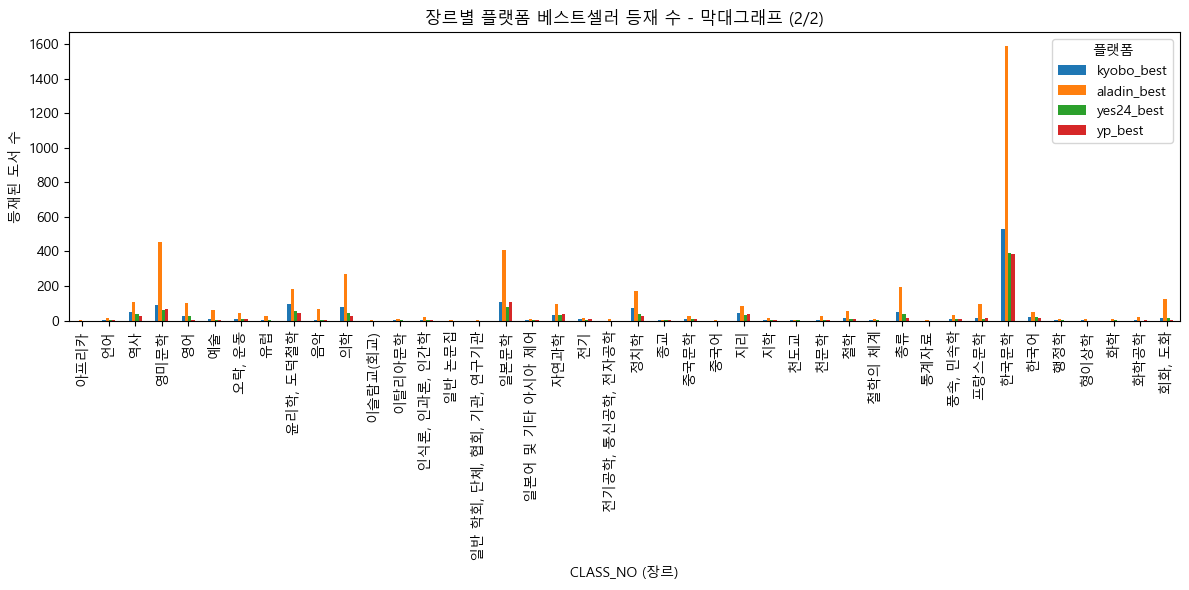

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac

# ------------------------------
# 예시: genre_best_counts (CLASS_NO가 인덱스, 플랫폼이 컬럼)
# 여기에 실제 데이터 사용하세요
# 예시 데이터는 아래와 비슷하게 가정됩니다:
# genre_best_counts = pd.DataFrame({
#     'kyobo_best': [...],
#     'aladin_best': [...],
#     'yes24_best': [...],
#     'yp_best': [...]
# }, index=[001, 002, 003, ...])
# ------------------------------

# CLASS_NO가 많을 경우를 대비해 2개로 나누기
split_size = len(genre_best_counts) // 2 + len(genre_best_counts) % 2
split1 = genre_best_counts.iloc[:split_size]
split2 = genre_best_counts.iloc[split_size:]

# 리스트로 묶어서 반복 처리
splits = [split1, split2]
titles = ['(1/2)', '(2/2)']

# 1. Grouped Bar Chart (막대그래프)
for i, data in enumerate(splits):
    ax = data.plot(kind='bar', figsize=(12, 6))
    plt.title(f'장르별 플랫폼 베스트셀러 등재 수 - 막대그래프 {titles[i]}')
    plt.xlabel('CLASS_NO (장르)')
    plt.ylabel('등재된 도서 수')
    plt.legend(title='플랫폼')
    plt.tight_layout()
    plt.show()


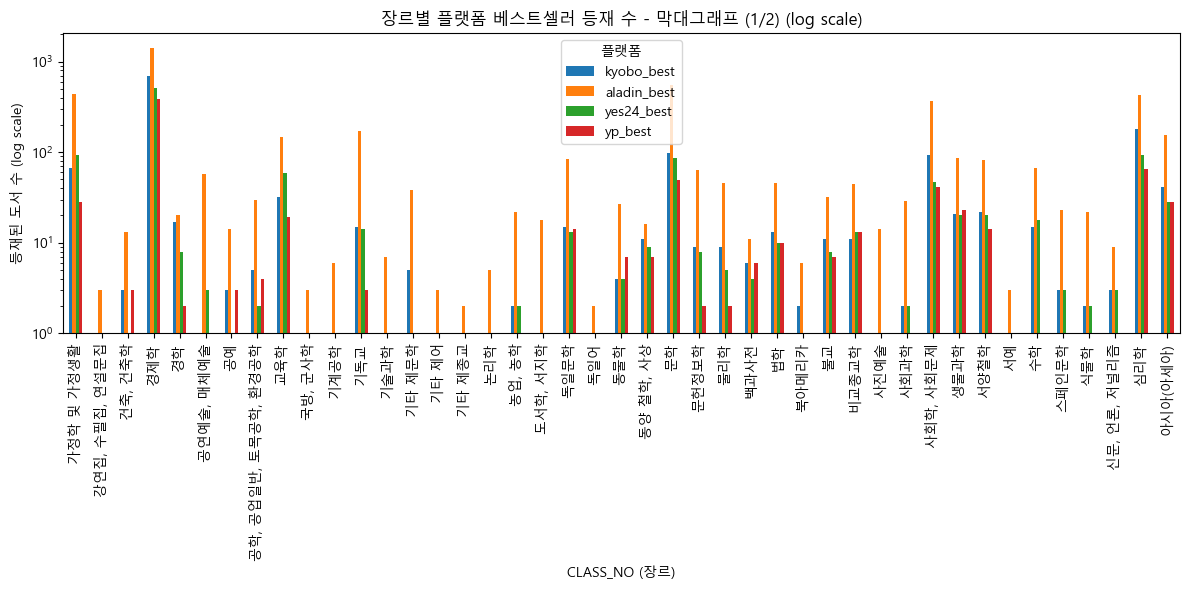

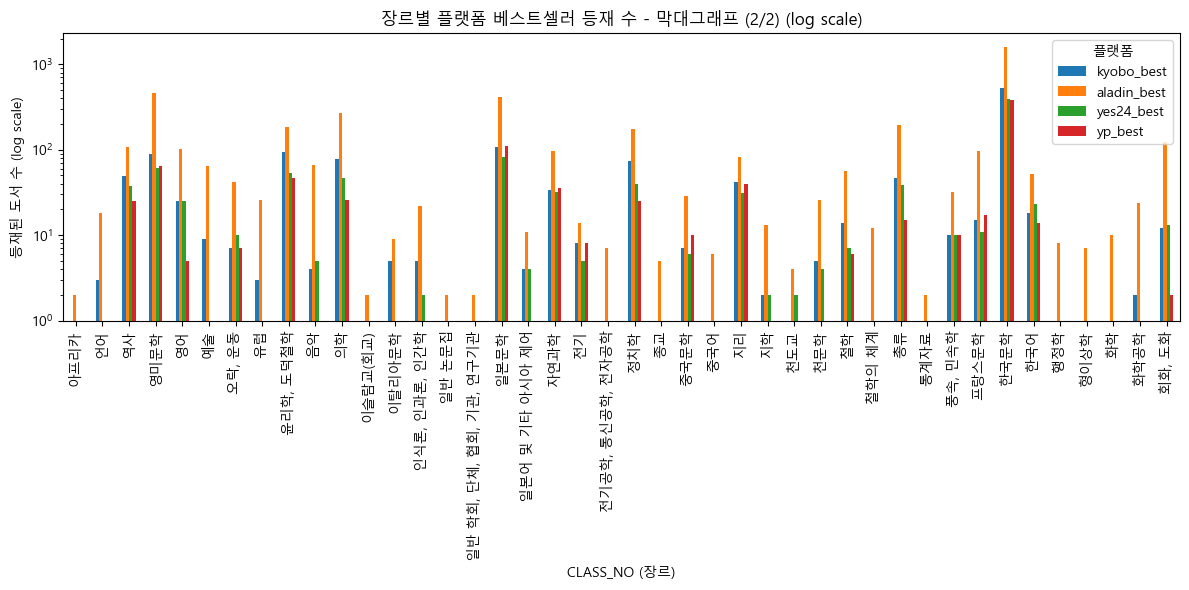

In [57]:
for i, data in enumerate(splits):
    ax = data.plot(kind='bar', figsize=(12, 6), log=True)  # log scale 적용
    plt.title(f'장르별 플랫폼 베스트셀러 등재 수 - 막대그래프 {titles[i]} (log scale)')
    plt.xlabel('CLASS_NO (장르)')
    plt.ylabel('등재된 도서 수 (log scale)')
    plt.legend(title='플랫폼')
    plt.tight_layout()
    plt.show()


In [68]:
# 1. 베스트셀러 플랫폼 목록
platforms = ['kyobo_best', 'yes24_best', 'yp_best']

# 2. 알라딘 베스트셀러 데이터만 추출
df_aladin_best = df[df['aladin_best'] == 1]

# 3. CLASS_NO(장르)별 알라딘 베스트셀러 수
aladin_genre_counts = df_aladin_best.groupby('CLASS_NO').size()

# 4. 장르별 다른 플랫폼 베스트셀러 수 계산 (알라딘 베스트셀러 중에서)
platform_genre_counts = df_aladin_best.groupby('CLASS_NO')[platforms].sum()

# 5. 장르별 각 플랫폼 등재율 계산
platform_genre_ratio = platform_genre_counts.div(aladin_genre_counts, axis=0).fillna(0).round(3) * 100

# 6. 보기 좋게 출력
platform_genre_ratio


,kyobo_best,yes24_best,yp_best
CLASS_NO,,,
가정학 및 가정생활,12.7,21.0,3.7
"강연집, 수필집, 연설문집",50.0,50.0,0.0
"건축, 건축학",25.0,8.3,16.7
경제학,38.4,34.9,20.7
경학,57.9,42.1,10.5
...,...,...,...
행정학,0.0,14.3,0.0
형이상학,16.7,0.0,0.0
화학,0.0,11.1,0.0


In [67]:
# 1. 알라딘 베스트셀러 데이터 필터링
df_aladin_best = df[df['aladin_best'] == 1]

# 2. 알라딘 베스트셀러 총 도서 수
aladin_total = len(df_aladin_best)

# 3. 각 플랫폼별 알라딘 베스트셀러 중복 수 계산
overlap_kyobo = df_aladin_best['kyobo_best'].sum()
overlap_yes24 = df_aladin_best['yes24_best'].sum()
overlap_yp = df_aladin_best['yp_best'].sum()

# 4. 비율 계산 (%)
overlap_ratios = {
    '교보와 중복 비율 (%)': round(overlap_kyobo / aladin_total * 100, 2),
    '예스24와 중복 비율 (%)': round(overlap_yes24 / aladin_total * 100, 2),
    '영풍과 중복 비율 (%)': round(overlap_yp / aladin_total * 100, 2)
}

# 5. 결과 출력
for platform, ratio in overlap_ratios.items():
    print(f"{platform}: {ratio}%")


교보와 중복 비율 (%): 24.02%
예스24와 중복 비율 (%): 22.25%
영풍과 중복 비율 (%): 13.37%


In [69]:
platforms = ['kyobo_best', 'yes24_best', 'yp_best']

overlap_with_aladin = {}

for platform in platforms:
    # 해당 플랫폼 베스트셀러 도서만 필터링
    df_platform_best = df[df[platform] == 1]
    
    # 해당 플랫폼 베스트셀러 총 수
    platform_total = len(df_platform_best)
    
    # 해당 플랫폼 베스트셀러 중 알라딘 베스트셀러와 겹치는 수
    overlap_count = df_platform_best['aladin_best'].sum()
    
    # 겹치는 비율 계산
    ratio = (overlap_count / platform_total * 100) if platform_total > 0 else 0
    overlap_with_aladin[platform] = round(ratio, 2)

# 보기 좋은 이름으로 출력
for platform, ratio in overlap_with_aladin.items():
    print(f"{platform} 기준 알라딘 중복 비율: {ratio}%")


kyobo_best 기준 알라딘 중복 비율: 79.23%
yes24_best 기준 알라딘 중복 비율: 98.48%
yp_best 기준 알라딘 중복 비율: 75.09%


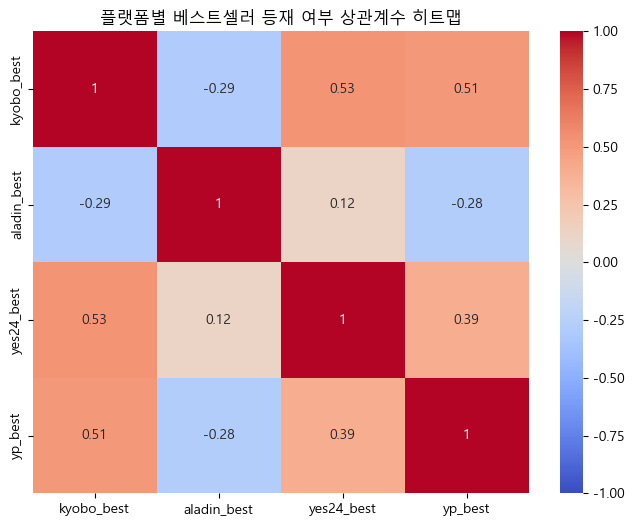

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 플랫폼별 베스트셀러 여부 컬럼
platform_cols = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']

# 2. 피어슨 상관계수 계산
corr_matrix = df[platform_cols].corr()

# 3. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('플랫폼별 베스트셀러 등재 여부 상관계수 히트맵')
plt.show()


대부분의 장르에서 알라딘의 베스트셀러 등재율이 높음 
-> 알라딘은 같은 도서가 베스트셀러의 등재될 가능성이 낮고 다양한 도서가 베스트셀러에 등재될 가능성이 높음
-> 그렇기 때문에 알라딘과 다른 플랫폼의 상관관계가 매우 약함

그에 반해 교보와 영풍, 교보와 예사의 경우 어느정도 관계를 가지고 있음
-> 이들은 같은 도서가 베스트셀러의 등재될 확률이 알라딘에 비해 높고 서로간의 베스트셀러 등재가 어느정도 관계가 있음

# 출간시기별 베스트셀러 등재율

In [73]:
df['PUBLER_YEAR']

0       2012
1       2011
2       2010
3       2007
4       2010
        ... 
9799    2024
9800    2024
9801    2024
9802    2024
9803    2024
Name: PUBLER_YEAR, Length: 9804, dtype: int64

In [75]:
# 플랫폼 베스트셀러 열
platforms = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']

# 출간연도별 전체 도서 수
total_by_year = df.groupby('PUBLER_YEAR').size()

# 출간연도별 플랫폼별 베스트셀러 수
best_by_year = df.groupby('PUBLER_YEAR')[platforms].sum()

# 등재율(%) 계산: 각 플랫폼별 수 / 전체 도서 수 × 100
best_ratio_by_year = (best_by_year.div(total_by_year, axis=0) * 100).round(2)

# 결과 출력
best_ratio_by_year


,kyobo_best,aladin_best,yes24_best,yp_best
PUBLER_YEAR,,,,
1981,0.00,100.00,0.00,0.00
1993,0.00,100.00,0.00,0.00
1994,0.00,100.00,0.00,0.00
1998,50.00,50.00,0.00,0.00
1999,0.00,100.00,0.00,0.00
2000,20.00,100.00,0.00,0.00
2001,28.57,100.00,28.57,28.57
2002,60.00,100.00,40.00,20.00
2003,20.00,100.00,20.00,0.00


In [77]:
# 플랫폼 베스트셀러 열
platforms = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']

# 출간연도별 플랫폼별 베스트셀러 수 계산
best_count_by_year = df.groupby('PUBLER_YEAR')[platforms].sum()

# 결과 출력
best_count_by_year


,kyobo_best,aladin_best,yes24_best,yp_best
PUBLER_YEAR,,,,
1981,0.0,1.0,0.0,0.0
1993,0.0,1.0,0.0,0.0
1994,0.0,1.0,0.0,0.0
1998,1.0,1.0,0.0,0.0
1999,0.0,3.0,0.0,0.0
2000,1.0,5.0,0.0,0.0
2001,2.0,7.0,2.0,2.0
2002,3.0,5.0,2.0,1.0
2003,1.0,5.0,1.0,0.0


<Figure size 1200x600 with 0 Axes>

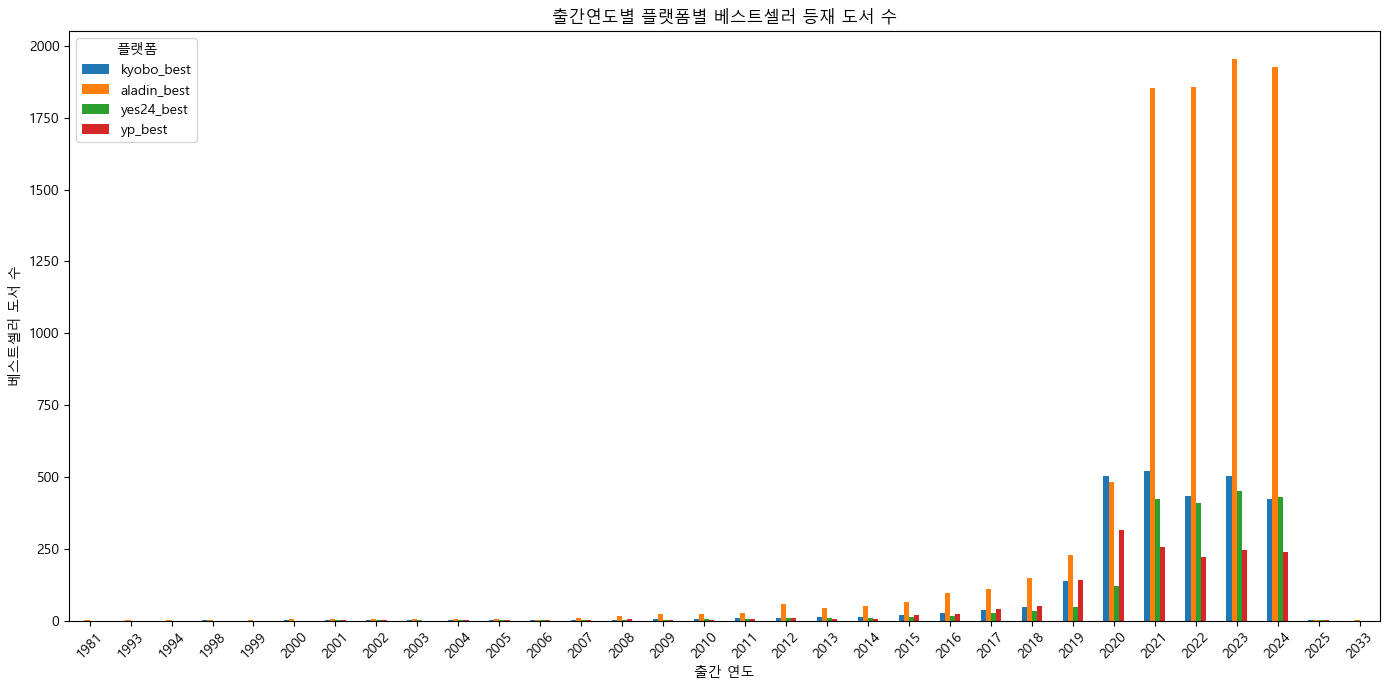

In [79]:
import matplotlib.pyplot as plt

# 플랫폼 컬럼
platforms = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']

# 출간연도별 플랫폼별 베스트셀러 수 계산
best_count_by_year = df.groupby('PUBLER_YEAR')[platforms].sum()

# 그래프 스타일 설정
plt.figure(figsize=(12, 6))
best_count_by_year.plot(kind='bar', figsize=(14, 7))

plt.title('출간연도별 플랫폼별 베스트셀러 등재 도서 수')
plt.xlabel('출간 연도')
plt.ylabel('베스트셀러 도서 수')
plt.xticks(rotation=45)
plt.legend(title='플랫폼')
plt.tight_layout()
plt.show()


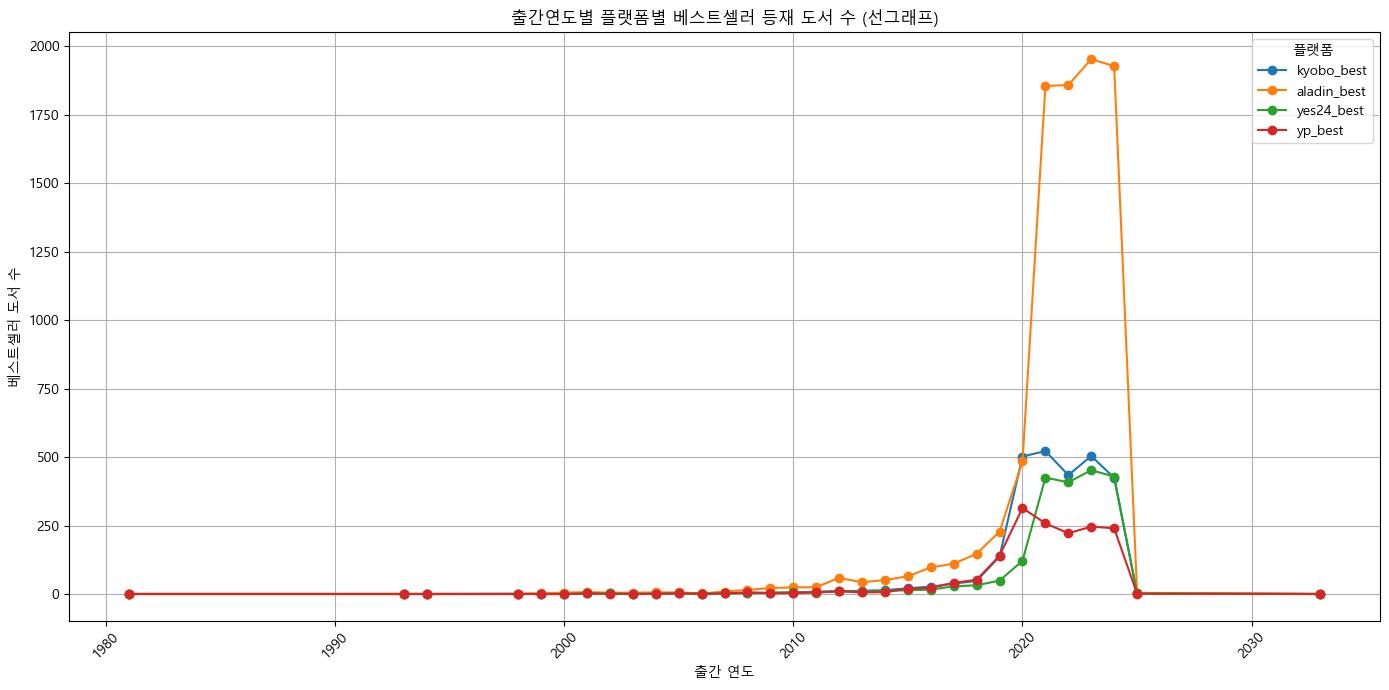

In [80]:
# 선그래프로 시각화
best_count_by_year.plot(kind='line', marker='o', figsize=(14, 7))

plt.title('출간연도별 플랫폼별 베스트셀러 등재 도서 수 (선그래프)')
plt.xlabel('출간 연도')
plt.ylabel('베스트셀러 도서 수')
plt.xticks(rotation=45)
plt.legend(title='플랫폼')
plt.grid(True)
plt.tight_layout()
plt.show()


같은 도서가 베스트셀러에 등재될 확률은 영풍, yes24, 교보, 알라딘 순
또한 베스트셀러의 경우 당연한 얘기? 지만 각 년도에 출판한 도서가 베스트셀러가 됐을 것이라고 추측됨


# 각 플랫폼의 베스트셀러 도서 평가점수 평균

In [81]:
# 플랫폼별 점수 컬럼 매핑
platform_to_score = {
    'kyobo_best': 'kyobo_score',
    'aladin_best': 'aladin_score',
    'yes24_best': 'yes24_score',
    'yp_best': 'yp_score'
}

# 결과 저장용 딕셔너리
avg_scores = {}

# 각 플랫폼에 대해 베스트셀러 필터링 후 평균 점수 계산
for best_col, score_col in platform_to_score.items():
    # 베스트셀러로 등재된 도서만 필터링
    best_df = df[df[best_col] == 1]
    
    # 해당 플랫폼의 평가 점수 평균 계산
    avg_score = best_df[score_col].mean()
    
    avg_scores[best_col.replace('_best', '')] = round(avg_score, 2)

# 결과 출력
for platform, score in avg_scores.items():
    print(f"{platform} 베스트셀러 도서의 평균 점수: {score}")


kyobo 베스트셀러 도서의 평균 점수: 67.72
aladin 베스트셀러 도서의 평균 점수: 13.62
yes24 베스트셀러 도서의 평균 점수: 29.13
yp 베스트셀러 도서의 평균 점수: 1.04


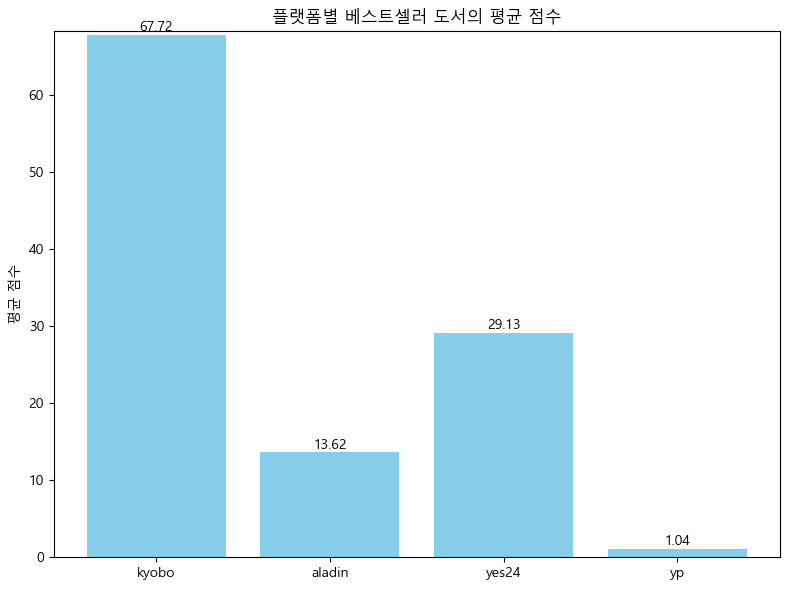

In [83]:
import matplotlib.pyplot as plt

# 점수 데이터
platforms = list(avg_scores.keys())
scores = list(avg_scores.values())

# y축 상한 설정: 최대값 + 여유
y_max = max(scores) + 0.5

# 막대그래프
plt.figure(figsize=(8, 6))
bars = plt.bar(platforms, scores, color='skyblue')
plt.title('플랫폼별 베스트셀러 도서의 평균 점수')
plt.ylabel('평균 점수')
plt.ylim(0, y_max)  # y축 범위 조정

# 막대 위에 점수 텍스트 추가 (위에 살짝 띄우기)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



교보는 타 플랫폼에 비해 2~4배 정도 높은 수치를 보여줌
-> 

# 데이터 파일
- 베스트셀러_최종버전4.csv
- 비베스트셀러_최종버전4.csv

In [ ]:
df1.to_csv('비베스트셀러_최종버전4.csv', index=False)
df.to_csv('베스트셀러_최종버전4.csv', index=False)